In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import time

In [2]:
def img():
    post_result = requests.get(post_url)
    src = post_result.content
    soup = BeautifulSoup(src, 'lxml')

    lead_text = soup.find("div", class_="p-article_lead")
    try:
        lead_img = lead_text.find_all("img")
    except:
        lead_img = []

    body_text = soup.find("div", class_="p-article_detail")
    try:
        body_img = body_text.find_all("img")
    except:
        body_img = []

    img = lead_img + body_img
    if img == []:
        pass
    else:
        img_url_len = len(img)
        l = 0

        while l < img_url_len:
            img_link = img[l]["src"]
            print("チェック画像URL：" + img_link)

            check = "http://" in img_link
            if check:
                img_link = img_link.replace('http://', 'https://')
                print("http:// -> https:// : " + img_link)

                try:
                    img_req = requests.get(img_link, timeout=2)
                    img_result = img_req.get()
                    print("OK: " + img_link)
                except:
                    print("エラー: " + img_link)
                    with open('Error-URL001.csv', 'a') as csvFile:
                        writer = csv.writer(csvFile)
                        writer.writerow(["imglink", img_link, post_url])
                        csvFile.close()
            else:
                pass

            l = l + 1

In [3]:
def video():
    post_result = requests.get(post_url)
    src = post_result.content
    soup = BeautifulSoup(src, 'lxml')

    lead_text = soup.find("div", class_="p-article_lead")
    try:
        lead_video = lead_text.find_all("source")
    except:
        lead_video = []

    body_text = soup.find("div", class_="p-article_detail")
    try:
        body_video = body_text.find_all("source")
    except:
        body_video = []

    video = lead_video + body_video
    if video == []:
        print("video tag nothing★")
    else:
        video_url_len = len(video)
        ll = 0

        while ll < video_url_len:
            video_link = video[ll]["src"]
            print("チェック動画URL：" + video_link)

            check2 = "http://" in video_link
            if check2:
                video_link = video_link.replace('http://', 'https://')
                print("http:// -> https:// : " + video_link)

                try:
                    video_req = requests.get(video_link, timeout=2)
                    video_result = video_req.get()
                    print("OK: " + video_link)
                except:
                    print("エラー: " + video_link)
                    with open('Error-URL001.csv', 'a') as csvFile:
                        writer = csv.writer(csvFile)
                        writer.writerow(["videolink", video_link, post_url])
                        csvFile.close()
            else:
                pass

            ll = ll + 1

In [4]:
def crawl():
    global post_url 

    result = requests.get(page_url)
    src = result.content
    soup = BeautifulSoup(src, 'lxml')

    main = soup.find('main')
    links = main.find_all("a", class_="c-post_eyeCatchLink")
    links_number = len(links)
  
    n = 0
    crowl_number = 1
  
    while n < links_number:
        href = links[n]['href']
        post_url = "https://blog.codecamp.jp" + href
        print("チェックするブログ記事URL：" + post_url)
  
        with open('CrawledPage001.csv', 'a') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow([str(post_page), str(crowl_number), "チェックしたURL", post_url])
            csvFile.close()
        
        time.sleep(1)
        img()
        time.sleep(1)
        video()
        print(str(post_page) + "-" + str(crowl_number) + " 記事チェック終わり\n")
  
        n = n + 1
        crowl_number = crowl_number + 1

1ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-vuejs-first
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16701/49eb6e3d6849db25107d275ccde1da11dfcfe193.16797.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16701/47134a9f4e2d9de7556775563354ff4cd9e7be41.16798.desktop.png
video tag nothing★
1-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-android-java-kotlin-dart
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16801/d67617a986ddf94fb9de8111ff4ebcb06a1d7cf4.16853.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16801/8aaa94f1931ded895687749f7169a23e995847b2.16854.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16801/09849e1c0ff609b202bffe9375fba445ae61cca2.16855.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16801/a280e14b42a30fcda8a5bceefa053c7d347b8c8d.16857.desktop.jpg
チェ

video tag nothing★
1-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-webdesiner-dokugaku-1
video tag nothing★
1-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-nyumon-1
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv5da03b40ca4cf&argument=qkDLyMCX&tag_id=tag5da03b40af366&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
1-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-javacript-dom-6
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16001/19aac85ceadebe807fd4b61bd5b224ca17c13c4d.16006.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16001/903f70f5ad9bff78c23317550c46ae04eb5cdd14.16007.desktop.png
video tag nothing★
1-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/webdesign-first-ginoukentei
video tag nothing★
1-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-ai-machine-learning-picture
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/164

video tag nothing★
2-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-machine-learning-service
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16401/3fa3a9d29d3b7030e1da713365f23fea664d9b8e.16478.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16401/bb24b2cc3880623625636c6593360f3f40f1eb95.16480.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16401/e1fdd8d3c52eeaed9ad91504da4c1d70d54feee6.16481.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16401/2fcb03b4876f30c622484a705dcab15d02f286ca.16482.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16401/f7530503340abccc39e7dd76f7191be74d947eff.16484.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16401/187c9383a6227e0bca3891ddad8b6c05f9bc2ac0.16485.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com

video tag nothing★
2-12 記事チェック終わり

3ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-aws-docker-mac
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16101/852fb61eaf476ad4e123cb0369cff6e52456011a.16155.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16201/3ca5a17b356249d3c0b19fb12a7c2738fc040513.16288.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16201/012f595e8a5d3372f37223b5ab75ddb7feb09b5e.16289.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16201/93c3db7dec237fca71d0ab30d3df40e663150344.16290.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16201/55386e0ea721a470b3b8c79e2979cd1dd1265e13.16291.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/16201/5f7cdd17231273f03c3699e3d41c13930dc7d910.16292.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazo

video tag nothing★
3-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/docker-file-how-to
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/b1f247929fbb4c535cf904b7d0d46aec16cb1c2c.15950.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/564ae2386aee7fe80f18b0095ab4e0fceebdb23a.15951.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/082908dfc53818856878d46f7563b48c7cd9f39c.15952.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/ac8b0fd4f3dbc513b1a7d545ff4090983dd18f05.15953.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/fb4d1c88bad8893b8ca3ee30b19bf4190d378552.15954.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/3903dfb1596e2584c0ac9e82340968bcd7c14e99.15955.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-

video tag nothing★
3-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-docker-image-container
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/c8f2cf955f0cd7e4c79423b6b30690bd90ebd7e1.15900.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/2268948291c16a151fc965d413d41d14f8583d2a.15910.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/b60d5dfab2d26d78d91bb6c6c49a984da69bcc96.15901.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/1d563c0c04597f0490f5c06eb1722e4b7f71914c.15902.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/6c85a991247112cd2249b3c4907a978ba9dbb5e8.15903.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15901/0da37658eba989b93e9161a2ebab6ff8390bc011.15904.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/

video tag nothing★
4-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-custom-field-what
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15701/7bd8207896094fd0b59aad97a5a6f038e2ed0d2a.15737.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15701/c093b9b040b84700cf5b98b41971fc3f18e14dbf.15734.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15701/4c42b06e09936117b9fe1dcd50509d2932fe86ff.15735.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15701/a69d2f22e5f2d3e9d2c9ccf3a998727ca0ef4361.15736.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15701/9afaeb7e0d11e954e724043d8b242e990e70db1b.15738.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15701/497536ed66696f2c5edaf3a5571fec4de08cd7bb.15739.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/u

video tag nothing★
4-12 記事チェック終わり

5ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-androidstudio-mac
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/6f1d0a299cfa04e4ca6964430d46820826640031.14676.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/c044d61477e4a10cf4e656bb0bf9f978a884bd7e.14677.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/2ccf1eb086b53f79629a3bfc867552cf316b0924.14678.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/3164781de5993c587487ef028883bca3ae5075c8.14679.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/6d031936cc0b694705d221403a26682a3f7875c5.14680.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/0bb4f098e2b308fdfe5c5f7351d9cf54638f37a9.14681.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/1

video tag nothing★
5-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-aws-ec2
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/7d497209b8a48186c2c070fa876621ab629a6256.15639.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/5c1278e52cbe05b09d231cca3bf156b7b33499eb.15640.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/08d3e7a14f50201631c908031f3e4ddcd97e3de9.15641.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/1f0c5c3c6a6c2b4efc3f1b4025926e1f6ac8d432.15606.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/ab790a677a25aaf613d98ed48547e80ec66d853a.15642.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/17db1fa7440b72f4cf92ac438a9c99318adbeb18.15643.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15601/9b6634127

video tag nothing★
5-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-andoid-app-development-5
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15301/5b03035cd0e112d5206ce7d95bbce810aaf25ee4.15350.desktop.jpg
チェック画像URL：https://digitalinfact.com/wp-content/uploads/2018/08/%E5%8B%95%E7%94%BB%E3%83%AA%E3%83%AF%E3%83%BC%E3%83%89%E5%B8%82%E5%A0%B4%E4%BA%88%E6%B8%AC-640wri.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15401/393884535293c5a3b048e1cbfb5052beeebf8339.15400.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15301/05a84a24114f5f1e9c30c30ff4c8c163eb6323f8.15399.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15301/ddbe990d36d57a251a814c0022ee8ca9fdd01cd3.15351.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15301/4ca04181f0d12cb3e2a95b0e24d95aa1ebcb820a.15352.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.am

video tag nothing★
5-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-school-kagoshima-8
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15401/fa75eb46dc3d4331c5983bcddc87047f4abebce5.15465.desktop.JPG
video tag nothing★
5-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-theme-free-30
video tag nothing★
5-12 記事チェック終わり

6ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-php-switch-or-if
video tag nothing★
6-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-theme-30
video tag nothing★
6-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-school-ibaraki-9
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/15401/fa75eb46dc3d4331c5983bcddc87047f4abebce5.15465.desktop.JPG
video tag nothing★
6-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-javascript-dom-css-3
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14701/9d81611776a813dfd3c11cfd280604c0

video tag nothing★
7-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-android-app-development-banar
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14801/9c8cd2b55bf808c8c9957fa61d97fc3978f3e71f.14855.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14801/618f17559542ee6b8cffd8e04271f1833d9b19c5.14856.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14801/1c59d83cac42633893e3fb2244ebe92d24a2dfc1.14857.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14801/9d34453a3037d6975d6ec70d5dd5daaa78a3e0b9.14858.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14801/5bc9177e5ef948ce65345ab17677d06c90a4f7e7.14859.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14801/890f9b4ac661aa4099a257a82846b4c2ad734bd4.14861.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploa

video tag nothing★
7-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-python-virtual-environment
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/22859089486ff4577792b2c812ce8d2755a90624.14606.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/79cd5dbdc61fbf4f3b286e058a287e8d928b748d.14607.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/ac000aa52b2dc63a3363ae692bf21eb4dde2248c.14608.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/efb33be6aaef985e0cb0be90cf578e198e1605b6.14637.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/385bb837b773382ab7cb2b0873fa328ec3289d36.14609.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/9c76de953ec07cc120de5d9e9c2195ac99e2470d.14610.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/

video tag nothing★
7-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-html-hankaku-space
video tag nothing★
7-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/codecamp-teacher-kuwako
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14901/7a2d9adaa1d27514f286b37b12deb5f3e27c574b.14917.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14901/27e4d41b9bf7e6e75d9efe90b0059893d1e48e5c.14930.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14901/11a3a32ecfb491bf5f29c0b9c1560262b53cd461.14916.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14901/917a7353c28fefa479f23afc0f6993e9c61f182d.14919.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14901/cd358cae5e6ae4ca51157966f3d4e829b61a8a35.14922.desktop.jpg
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv5cad91c52279b&argument=qkDLyMCX&tag_id=tag5cad91c51fc51&dn=adHJpYmV1b

video tag nothing★
8-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-javascript-chrome-sources
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13701/a32b8716bbde1f6fe7b2779c84b0c9437edec96f.13736.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13701/d031ab0daa1861a662ba97dfdb20ddfae20e93ff.13750.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13701/aaaa51201178e07b230eb4ba6c7d9de4b9a78614.13739.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13701/882911ecc5e66848044fca8a75f41fddba4bc2bb.13737.desktop.png
video tag nothing★
8-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/android-app-development-1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14701/1d26fb555ac0ba49faa339762d042e8be97c20e1.14726.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14701/c2a667a02f39ee635288180bbf2535b

video tag nothing★
8-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-swift-beginner-class-instance
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/172ebe2583156b22181a96738f40042ac4dbb1f6.13647.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/aaf84e56ff13236e1f364346d4503733ea4057b0.13646.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/f1a310a4b9d474598e014ad7a0076ea3203ee936.13648.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/9592379afbd5cf518bb71540a39c739a87fa9805.13649.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/f921ce48ef094fb87f19c87db6bd7772740411de.13643.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/4b2bd50e1f523488da948b89d30a40eeab96bf48.13645.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploa

video tag nothing★
8-12 記事チェック終わり

9ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-extreme-what-1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14601/23729b575f7cdc978500e39dbc6b3b2f92185eee.14639.desktop.JPG
video tag nothing★
9-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/miyata_interview_codecampgate
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14501/6ef44f151a6be13eb1d62fc87d71e96a842a531e.14533.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14501/f1fb8739919edf04964b93eb21c89a270d8e1a9e.14529.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14501/42f3f70529e731057f794c0d2c712c5b36

video tag nothing★
9-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-what-overview
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14101/9ed022b7f7016a79d3b982fc427740dc44bb6b4e.14181.desktop.JPG
video tag nothing★
9-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-html-word-slanting-how
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13101/f04b50754d1a0b328dfd8d75bdf84b6a32be7cfe.13166.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13101/9763e603c8a720df10532852c2a2288c5429224a.13167.desktop.png
video tag nothing★
9-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-javascript-dom-1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14301/5d2b0122b3269c26b7114691d659261741b4ef13.14369.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14301/8cc46fe966af311e317a8b77f3ca1b7c352766f0.14370.desktop.png
video ta

video tag nothing★
10-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-javascript-first-curriculum
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13401/4ed18b477347e9d0b0761c471ce2646642aaa493.13427.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13401/d602ac89c8381beb209085d8b99e1fcfd33189a5.13429.desktop.jpg
チェック画像URL：http://codecamp6414.lesson6.codecamp.jp//blog_codecamp/201812/JavaScriptStart/img/Webp.net-gifmaker.gif
http:// -> https:// : https://codecamp6414.lesson6.codecamp.jp//blog_codecamp/201812/JavaScriptStart/img/Webp.net-gifmaker.gif
エラー: https://codecamp6414.lesson6.codecamp.jp//blog_codecamp/201812/JavaScriptStart/img/Webp.net-gifmaker.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13501/7cb27a34c5d157e672ce672565eff2824dddd52a.13543.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13501/cb66b9bbd89b78705f628d9c025a96c14f3fa253.13

video tag nothing★
10-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-php-info-1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/32e8abc1e634d4e9d9cea982dba3187df16fa71b.13328.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/1892c7e0af1d74c7a1f07e578708d31339fa2c68.13331.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/d40e7e41f59ac83bfa396e0522764d25093a7ecc.13329.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/6ecc735cd3a960056a44f059329a854913e71ca6.13332.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/5950abd380431d99234b965c9d4eac14cf661092.13330.desktop.jpg
video tag nothing★
10-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-smartphone-service
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13201/b7a03a4272d964b2c05897c9273184776c9f52

video tag nothing★
11-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/tanaka_interview_codecampgate
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/139a4834fbcbc00241f9970f37626cb56af585a4.13660.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/03b2a39bd2cc0b4e15c93f0d272a9c2343a8cce1.13661.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/3d0142c329eec7c24d8e2832c8a9135e53707d3c.13662.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13601/7c1328808616f8d4e631a2a2b5bac973a7f525ca.13663.desktop.jpg
video tag nothing★
11-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programm

video tag nothing★
11-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/iphone-app-develope-original-calculator
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14201/8bacaa2c0fc2134b4f0efd80e8e82bec2d61ec4b.14269.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14201/1059c6b5473d4b8ae24ac28304d027b41783edbb.14271.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14201/861af738ef0cdb5c92a5fb4b97e134b3a32be2de.14270.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14201/c80d22a8c984cb089151f4065116ce7ef316e3e3.14272.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14201/9674f93428bd80b972becd59eb4a916db1c08bec.14273.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/14301/f6c5dfb814d40b43c848f460b06e08574cd023a1.14327.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/upload

video tag nothing★
11-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-web-develop-design-1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/6d72e3d9293cca472c6f78dfd703974b379e2a57.13334.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/c36fe96ed5a2641b75cf3c06978434473e56190d.13335.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/aa1e670c014d8d25da376ae3bffee142f271983a.13319.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/d78e8934c0236418e3d624540f3afd6fdc6eb36f.13320.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/716a46cd886011931a5f7ff4a28c50826ac7d933.13322.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/91e58e3befc9e9f54f8a22e1318ab6f22f0bfbe7.13321.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301

video tag nothing★
12-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-python-compile-can-1
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/2cc8bbe781b8106a3acd0a50d480959ec8eba501.12654.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/0202432008d4a9992949d8f531c62af19ebf77b6.12655.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/25522af52f12a610d8b67f8089bbedaf1dace3a8.12664.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/08dbb84a2743bc6653719697133c414a1e006f54.12656.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/6dbd95bb9e1e555977a9f2bc025f8d83080f1b76.12657.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/9deb6020f2a2120195820a4d0ed12b432aa18c82.12665.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amaz

video tag nothing★
12-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-html-editor-15
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/fcd54318e91a6c402d0dcd8bf6a39074d406bd49.13014.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/dfc4740d90d56df54cc65034f269da76e8f7bde0.13015.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/16505f76109dd9b31fc0587ca1c312e029545d2b.13016.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/bb9a0fc16a08e010cbc92d392f726451f38dd74e.13017.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/fa883caf5709b6625a8daa8815ae1f8f0e87aefa.13018.desktop.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/a354ef9a8bcde2db59b7f9a82aafbdf54761c05f.13027.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/9334

video tag nothing★
13-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/konicaminolta_interview
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/89c80edd4bf718f4d6baccc93ffde2875117d4aa.13382.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/16bea99543a2d4c7ddf2615594592fb3833fef12.13343.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/b34105f206e06c13f1a6c91b30dea2e48d97d58d.13341.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/cd8f329e7280c294ebab7c25427a1803cb164e71.13342.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/4f856ce01140c57b7b765fd9628e2aceb54ba7e5.13347.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/3347a396c4c47162d0959911bc2458d9adc8b7bc.13345.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13301/5a8e9a16

video tag nothing★
13-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-html-color-change
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12901/a14c21326924b2bc7e78fe851f86f3b176741df6.12933.desktop.jpg
video tag nothing★
13-12 記事チェック終わり

14ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-python-debug
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/b56367277bbc502668f2680d5f30a2f5e2ab52d5.12833.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/a406335dcc36d39e1db7d8f5cfce1f93d902abba.12834.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/f6d1b6a074db4203145cd461a7397dec6b9846d2.12835.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/b3d1b70c8e8f1ba872661bca645ca05b9113c595.12836.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/7e34129cabf6fc9b453da95acd45

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/e90ce8703a6a305c09acfc2f452ecbfed3adf547.12004.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/e33050f8798f4082733df9553dba02f841b70aa3.12018.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/32ae11064627cd5b172952de47af7db6b1fbeb7e.12082.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/3fa986ba68b17965debe45fbd477b13e5ddedeec.12023.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/27279e70399b9c9c8e5163fb2a84cb4dc8b365ca.12016.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/69381939ebacfb3c53f5d97b58fcb9fd1ef4d11e.12021.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12001/d2c8095f91d399785e46250c18ff5f0961f8cc4b.12017.desktop.png
video tag nothing★
14-9 記事チェック終わり

チェックするブログ記事UR
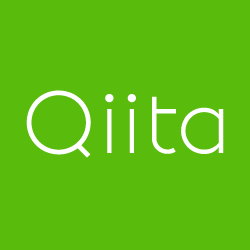

video tag nothing★
15-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/kuwata_interview_codecampgate
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/15aa8fdddd359c305c1c84821fecb7c433d8a2fe.13011.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/57b58e2631c32b588f3087719afb15d65607d7f9.13010.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/bb18b6dfca9b417a97c1ce5061b974332fca4549.13012.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/13001/274425e3abad680dc1bd27f8a85a11a341cbae78.13013.desktop.jpg
video tag nothing★
15-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programm

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12701/1f79227afcf9a9e3e6eb267ed848a7daed469f77.12799.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/d5b117936e0c272601965d50defef4c5b04b1541.12800.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12801/5e508f4430a6c4fea8bfcd23a262fc76b696ce40.12801.desktop.jpg
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv5bac403229b5f&argument=qkDLyMCX&tag_id=tag5bac403214f66&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
16-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/javascript-wsh
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12301/d381f32ee9ff6b20eb1cd916fe0926ffec5600ed.12383.desktop.jpg
video tag nothing★
16-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/python-engineer-test
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/8c67f5fbad85c67fd13c92a45782d37d8a3afb23.12671.desktop.jpg
チェ

video tag nothing★
16-12 記事チェック終わり

17ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/javascript-geolocation
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12701/f2dcff892d81020b10b09c5d4179fce485d991f3.12779.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12701/6cb7f659168a26bb865054c9756a90535ee263f0.12780.desktop.jpg
video tag nothing★
17-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/js-callback
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/9ba2111f4638a76bbe9d746305962daff300941f.12639.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12601/edc142ed5dfef6bc79855f01ae858f9c068e6f37.12640.desktop.png
video tag nothing★
17-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/js-scope
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/ae9d1a9dfe2a2cffc72be7dad441b376da14ad2b.12596.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.co

video tag nothing★
17-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/python-editor
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/b29d2e96dcdebf62b41615ea9321f8d15c617999.12521.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/52cf8de29158a546318ada9ad2e7895cb68a3a67.12522.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/38ba3442025f4eb6d53f86445b648956fd6c28be.12518.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/664bee019216f3391c0059a239914f9ba7ce54ea.12516.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/225979f53366aed5ad703cb9d33b01ea659ab290.12520.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/cf5e553d3355481e206f99471faf7778d142c931.12517.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12501/53cf10bf067db7d27

video tag nothing★
18-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/ptyhon-tutorial-13
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/4e02217cd50838f38614e8c3c692fee4060dc58e.12455.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/e83e73c0bd162890dec69b2ad4a039002de84fb2.12456.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/75bde6b3d174c394a8ce8d194e3e8688b0a633e0.12457.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/f57d4e027a08f40b9bb69689acdac880cf912d3c.12458.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/63b48692fdce0b11561ef3792dcd8da3135aa950.12459.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/aad108f82e56aa1b925dd341f2559ece50ab0bbd.12460.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/44ae357ee1f67

video tag nothing★
19-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-if
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/2233c15a7f3371fc6e6a8afeb5089b5411db19a1.12445.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/d376456e040b34475b368357de6e858ec7186102.12446.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/c2f2027a4d4fb2097940cc60abf7f73b880fc485.12447.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/b401f904c6c4b494a6d40289d3a40c7674c50a1c.12443.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/717402860968cfba522fbb9d4ef0ba92d3d878a6.12444.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12401/fb18edad21517be70e7b1d02dd2cfa812e215bdc.12449.desktop.jpg
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv5b3471d97dbed&argument=qkDLyMCX&tag_id=tag5b347

video tag nothing★
19-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-javascripr-variable
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12101/9ce1f394b955306f7c450cbf0d96d2f17f6a1394.12156.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12101/697d97d6bd745a0e3806429d9bb01434e36b27d4.12157.desktop.png
video tag nothing★
19-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/python-function-sample
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12101/d1f7d59e5e6063c729cb572ff31e80b8202dec9a.12154.desktop.gif
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12101/44e67b4db569219843dc10ac9a503834cfabedbb.12153.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12101/14ed47827e4a8106959b74495d2d9aa289b63396.12152.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/12101/e37d8bc267a2d

video tag nothing★
20-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop-demo
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/c16f405fbb9f277657c05a003b2feb770a193534.11970.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/d46b189ce8fff428c75d86d56d490fbb22eec154.11969.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/d1f656dd856cb34214c3d276b6bb7c754c5ac309.11972.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/b657c665ceccb6e141acc267a61010dd0061a677.11974.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/80b81a38fce666c70e2f1f2e5839f95b9fcfb641.11976.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/71a59a15310913352066cc61b27158f98ed40c1d.11977.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11901/96c26bf5d14ec06a9

チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11801/87d18bc83456851aadc98cf92542e521a0cb95f5.11847.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11801/d562a725c2f8c1a087304a09330dad3b3f57d233.11848.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11801/ecd55c1fd70adec3c04f880cc6d537c51e265339.11849.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11801/29af224dbde7770b91ca027ddc4ffbb432240572.11850.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11801/d516aff2cec913c5e7ee9cef63c86f688f3a0285.11851.desktop.jpg
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv5ad86342e1011&argument=qkDLyMCX&tag_id=tag5ad86342de517&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
20-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/swift-iphone-appri
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/

video tag nothing★
21-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-deta-backup
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/d71808ef39fb019ff18f46f13aae6697520687ad.11693.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/969a500912a8d2362acb298e26f468211774d22a.11687.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/1dc2766a92c14a6a7c24a53ab62ee2bbc11a95fc.11692.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/400260f97af0fb4ca09cd1efe737a21d2233dacb.11688.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/62e9f931c2cb79def39b12a0f08a925d84a434b4.11691.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/93a292dd12e00e1ecbf7026ab871de4d7a7959f3.11690.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11601/0aa95adacb

video tag nothing★
22-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/javascript-image-data
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11401/d6280f16f95a0143b073adab58eb5fa3fe476fcc.11477.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11401/fc9c75c0b58220fa23baaee259d9b8c165369d21.11478.desktop.png
video tag nothing★
22-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-php-comment
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11401/4ac21015ceac5cf8b67cf098c988acf87a11b9c8.11474.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11401/49c674149aefd47aa16d248d9a18115a7fbdcc17.11472.desktop.jpg
video tag nothing★
22-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/career-eureka-cto-interview
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11501/1c58dc195621d14767c1268648c445f910e00c32.11536.desktop.JPG
チェック画像U

video tag nothing★
23-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-make-games
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11101/693ecae55aeaae5e690c090aee3edc991c4d182e.11109.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11101/5793ae86eab1ee662cb5bd5d736badbcb8e99b2d.11108.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11101/53d9072a587eb2ad549401818b0c40e958dfbbb5.11110.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11101/7b21848ac9af35be0ddb2d6b9fc3851934db8420.11111.desktop.jpg
video tag nothing★
23-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-school-working-adult-10
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11301/3ed6843e94d392861a03fae510e80f4097baf87a.11314.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34101/3f7f960c45d342f850436726cf8c5b

video tag nothing★
23-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/shino_interview_codecampgate
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11301/b5df7c6abfff81617a2cbf07365345d4d99436d2.11361.desktop.JPG
video tag nothing★
23-12 記事チェック終わり

24ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-Java-date
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/2f911dc032e3791580861eac6e6c886d50e48f07.11286.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/f6845bae4de896138b37671d1098ff19f4a92929.11287.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/dc1377a51c15061076aa5a04e1f48649916667a4.11288.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/95d45dc0b007cc0f8c43b51e6be6e1f1bb

エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
チェック画像URL：http://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
http:// -> https:// : https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
チェック画像URL：http://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/132d9540e14f4ed8a709337d6d9c77d41337c93a.11237.desktop.png
http:// -> https:// : https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/132d9540e14f4ed8a709337d6d9c77d41337c93a.11237.desktop.png
エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/132d9540e14f4ed8a709337d6d9c77d41337c93a.11237.desktop.png

エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
チェック画像URL：http://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
http:// -> https:// : https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/c3209d781693b7c682bbc43dada616496bae40b1.11231.desktop.jpg
チェック画像URL：http://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/132d9540e14f4ed8a709337d6d9c77d41337c93a.11237.desktop.png
http:// -> https:// : https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/132d9540e14f4ed8a709337d6d9c77d41337c93a.11237.desktop.png
エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/132d9540e14f4ed8a709337d6d9c77d41337c93a.11237.desktop.png

video tag nothing★
24-12 記事チェック終わり

25ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/Illustrator-school-tokyo
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/a9d646164d533489aeba63d503a7bb753d3fa0c3.10934.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/b1c741f0cf7042180e01bdb845568723342d99cd.10932.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/f2315b564e21b97ababa84d4964f3836ac709cf8.10935.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/190eec3b2f51b0d5cecbae554bbac18d46814e8f.10936.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/02d255ee18a0c4310139212b5adfc460b3d3f5fa.10939.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/

video tag nothing★
25-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-create-website-5tips
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11001/3b1c4fb5b3b026aa6dea1b708fc181a4f85c5708.11003.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11001/eeef6c7c00746bc72b6749525b7125dc8622e47f.11004.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11001/03437a00722464ff2b0ded7f90cffa75d3ef0716.11005.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11001/41180740b1f148729ed4ebfafa72c8ebc49f401e.11006.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11001/1d14adecb427cb870e0f2cf25d93bb4a80bd17dc.11007.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11001/f

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/b03f89a80d0e1b7627e571a439afd9468b5b542c.10994.desktop.jpg
video tag nothing★
26-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-java-or-php
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/019a954af7fbddb9f1d38528b0d2a6d328b35039.9049.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/27de42e4cb9409df4ddd31a94a4039b1282800ba.10989.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901/9145dcacfa7fca313ffe2e8dadec178e7dc53048.10990.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34001/c6af642f9f8d24a4244904638b72001ab011a583.34011.phone.jpg?1493105217
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10901

video tag nothing★
26-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/web-programming-language-5
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/f79ed0649c0b57573dbc5f2748d1f2f8b01ecb13.10833.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/bd2f8419585af182a5001deb23aa46205681b1b1.10834.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/231e26004b18be8d249d43559470b0a6a81ea790.10835.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/ca43700a9735dfe0f5c21c661b80d1cd3cc60925.10836.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/8cebc8a724eec14919a2c8a0ba315c10f4708b4e.10837.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/045fc1f

video tag nothing★
27-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-school-fukuoka-9
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10001/56fb44149577bd81536b5098f4b142e35cd4f923.10044.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34101/3f7f960c45d342f850436726cf8c5b242e849f66.34136.phone.jpg?1555398543
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34601/14328c157b327043e5d8a6c17072e7ed7b574ce9.34655.phone.jpg?1551782900
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34501/c0ddf26bc94ef2f32407045bc3d97017fb8ce4f2.34517.phone.jpg?1555399617
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34501/a52c8b93834f7ba028159bb2e8cbaa00d9495f48.34596.phone.jpg?1547786171
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34501/316070034becad7d6771d7d55ea57c84b55e6a6f.34520.phone.jpg?1550117558
チェック画像URL：//s3-

video tag nothing★
27-12 記事チェック終わり

28ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/javascript-function-use
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10201/6f3148d6fe56c0a0f2c8f0132afbdb9174093582.10207.desktop.jpg
video tag nothing★
28-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/ptyhon-recommend-books-11
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/33501/7d5304fa783a0f1e1008c57e3da3ff8a958ee6c6.33594.phone.jpg?1555398159
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10501/1efa9289cf3c739e93e6fa9051e780f563c7495b.10558.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10501/7e51a2664f58b072023c2b041d11814de7ce2d99.10559.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34301/4290a2c5783e20e9a776562e59a55a1483552982.34304.phone.jpg?1511520674
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10501/33486e2b

video tag nothing★
28-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-day-of-the-week
video tag nothing★
28-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-display-errors
video tag nothing★
28-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-0-padding
video tag nothing★
28-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-datetime-calc
video tag nothing★
28-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-request-url
video tag nothing★
28-12 記事チェック終わり

29ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/php-datetime
video tag nothing★
29-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-floor-ceil-round
video tag nothing★
29-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/scratch-games
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10501/21e8106b6a3ed78d12733797a872e51327aafb06.10519.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10501/d38986ecc55e9371eb39df4576db9ebf5cd37569.

video tag nothing★
30-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/dns-ip
video tag nothing★
30-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/ruby-case
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/12888163df3ba95aeadccd4d10dfd6b3b0016ad6.10814.desktop.jpg
video tag nothing★
30-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-redirect
video tag nothing★
30-12 記事チェック終わり

31ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/ip-address
video tag nothing★
31-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/web-desing-movie-site
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10301/5088e14a92b74f6e645cd4cc6db3109176f2931e.10374.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10301/e5ff865e2d889400d0a95075e5e437d308d5406a.10381.desktop.PNG
video tag nothing★
31-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/ruby-regex
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/produ

video tag nothing★
32-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/Inexperience-engineer-5-tips
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/f06d8cd744b94c1e0f3efc97a6d96ed55a5f396d.9984.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/33501/7d5304fa783a0f1e1008c57e3da3ff8a958ee6c6.33594.phone.jpg?1555398159
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/dc83e82292cb0ed3c5d7285bd33a6dff42317e00.9982.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34001/5acca96b13d7a4eded383d5dd10eb9689b27fc25.34010.phone.jpg?1493105010
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/9e3eebdcd3d3586859fd8511a516be87a487bfb4.9990.desktop.jpeg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/pro

video tag nothing★
32-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress- merit-3
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8701/ad54be9c6faa99233dc1a1fdbce1cc075d94c7eb.8792.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8801/3d81b1c9b0e5659a27e4a3436afbc1b662f709af.8860.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8701/2808a67dea800d419fafd1390e5ac340c1faafc0.8793.desktop.jpg
video tag nothing★
32-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/html-tag-write
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9601/f9c3771359dda570e6cd735298e03a7e19342660.9656.desktop.jpg
チェック画像URL：

video tag nothing★
33-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/codecampgate_ohara
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/0e8d3a419c4954dc2561fedc66fd56eebfc73cc7.9930.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9801/b09a5a43cb8d706d43bae5b0e83de5c26f393f39.9881.desktop.JPG
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34101/3f7f960c45d342f850436726cf8c5b242e849f66.34136.phone.jpg?1555398543
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/99fb9b9a34d084cc3628bd612e6120ccbe232386.9917.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9801/90b609d3aa8b7d99c138e23f183d1a2352ad562f.9878.desktop.JPG
video tag nothing★
33-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/hokkaido-programming-school
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/0e4b368f1300cb689570cb50819d7d124b6a6ea3.

video tag nothing★
33-12 記事チェック終わり

34ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/posts-34133
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9801/9b82ca9c4b4efc235f1a9b6c99ebbe5965543abb.9845.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9801/f023c76b06ccbf47bbc302fda3dc7bb1c6fdd707.9846.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9801/50cd1cf6b263a274046989382f64e88bfb5214e8.9847.desktop.jpg
video tag nothing★
34-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-training-school-11
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
video tag nothing★
34-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/entrance-into-swift-site-16
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northea

video tag nothing★
34-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/application- development-tool-8
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/0e8782e0edf7aa7f525084f7e97b3ef099447621.9048.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/37e1a5464dbf7f3be7ccd91e726e0c3b1cffe086.9456.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/22122f1837586023e92e716343d0a0124783da75.9457.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/aba52f5e5d836dade5bc20cc46c70aa33dcd9de9.9458.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9501/8e634f0bfa6c67af276e40e553d18bb7578a7ea4.9591.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/a8a7c57675bfaaef6c33489b775985b7947470f1.9459.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/0e8782e0edf7

video tag nothing★
35-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop-beginner-studi-site-13
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9301/d6e3f9fa0dd927735f5172aee29b47744199392d.9327.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9301/1982be06b41337d8297286892a85f3d2cbac016d.9325.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9301/48884e69bbe15197bb9714b233b37202014e5a02.9330.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9301/b087d8bb863808f6575b4e9515dbd9dfa9873fc5.9331.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9301/76d03a7dde9f12feeb9d57b08999ed65e8960e72.9329.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9301/f08b9615f7af

video tag nothing★
35-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/css-write-beginner
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/0b19afb291aaafd89d62e39f971804353cc8072a.9498.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/aa5eb1771328ea9a8d189d420678d824024bc2df.9499.desktop.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/47e23d3867c5c22f889fdc7595bdc42527058e52.9486.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/9e28ad3523c0b923c3c78bc6feb63dd6bbd8018a.9487.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/d777903fb85b47346a5e45ed50e480eb008f7bf3.9497.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/ddfd1f903c583aa01d4ae9022ee5dd02435bf392.9496.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/08575848ba29f7005356841f8

video tag nothing★
36-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/use-line-height
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8701/6bed4fe6377842a42719bc279d6c3671701213fd.8724.desktop.png
video tag nothing★
36-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/LINE_interview
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8101/935658277547ec30f1cc6451e3414f1084490b6a.8119.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/e22276318bb87aa75b41b73b971395cf9fc7dc51.9416.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/304e59675f793cae907fd269094c729d07a9a2cd.9411.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9401/a129e1daf7569d994c99db2ce01fdb9621aff072.9408.desktop.jpg
チェック画像URL：//s3-

video tag nothing★
36-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress-15-tips
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8901/794c24b654b9ab3a06df0557e5f643ee5308dc8f.8919.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/236f71eb739251799b2b6b5928c70f12118a0fc9.9250.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/6c05402dbff499efa12629e4225671772c552c3a.9251.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/f3fd6fc78de048ce738709c0d9b97bd5f62db5a8.9249.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/9902a156c99a89de26c01e4bbe3c2b350eb3f81d.9244.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/1eb8ee63bc0399220af5376e77b

video tag nothing★
37-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/css-comment
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8701/b0436ef7c3fc259045a99afeca7ce72d38b020c6.8744.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8701/3ffe509517936b27abdb5cb74f219bbbf5c7e221.8745.desktop.jpg
video tag nothing★
37-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/css-font-family
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8701/40554054e32fd673f3e30f9d7f7902dc5b0d4a65.8761.desktop.jpg
video tag nothing★
37-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/what-is-php-beginner
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/prod

video tag nothing★
37-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/html-appri-site
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/e5b259473d338ac5c15b9a868fb04f988847c289.8232.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/19513ad919291f77e4c50045876525654b2a11bd.8227.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/67b3808fac79cbad380ff8550a72354870be5b73.8229.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/c74b161787cb0c4da102c8e8dfcce8b47f1b4d4a.8228.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/5abf5b53c561c1d8ffb28c08fa318dbf1ed10982.8223.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/4811881410fba937742e77aaa9c22af2574c1abd.8231.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8201/c06dcec4b5978e64d32f7d5c292d

video tag nothing★
38-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/web-desing-online-study
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/3cf580def1a091eb8df76d3dafda1ca45eb78ceb.8354.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/8e013830aece97da071fe0a42172d9e54b88f04b.8348.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/1c17e9994c118de3d44f6c97366c113d8646ec93.8349.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/36e04063f531da66f95d235b14658b5353b2922f.8350.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/2ca69bc1201a67612ec5d48c68b87bfece5f2422.8351.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/64383c7cd5454db9effd53c29dd7a17ae642af74.8352.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/e2aba1aa6046177818248

video tag nothing★
39-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php-beginner-site
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/e60b4215aac919c1a2652b1fb58356291fa0eab2.8637.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/76592be7673714a5cbd96f773f8d8375f2ddace1.8625.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/ee77af76539442c481fba80a5799821a31106fb3.8628.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/6d5d0e0ad4133001f66de46a691302b0b620afa3.8626.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/88c156edb57fa88118c1d095ee96afaacf72bdc0.8629.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/05c56d0e5b0b0c86a59e37db04d6d9f9d0d2a40c.8627.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/1c348c3bef8679d018cd37d7279

video tag nothing★
40-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/qrio-smarttag
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/7259dc7824a615a28a72c33ca160ab836a6a6718.8322.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/13100067f837cd2d4a75bba344f39f7fbd0567c6.8333.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/0e83e3fb34b96d80c0a367f5ac531aae4bd2d769.8334.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/053c5ef1e0e1376d37036cbc896bb72535cc18b9.8311.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/7b3fc9fa348bdafd295682aab0a6805874f9d884.8331.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/12b9f789459cd37bf83f6ed3d6c21ca34e1c2bf6.8308.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/7e69ae2d6d21ba4c0ddd8731b7013a1

video tag nothing★
41-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/ar-news-2
video tag nothing★
41-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/java-books-1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/95311e4edb0d354d7d69648f1825619d2a69a885.8316.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8301/72da9d0bdc86deb013121cafc374baae37951fab.8313.desktop.png
video tag nothing★
41-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop-command
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7001/bf70f2bdb7517c45af5b19958387437d08e62fc3.7029.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7001/85b7c9066284e255818076eb5fe4990288dd38bd.7030.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7001/e78e3907d29159f53abe8a802b3c246d8d9a2df7.7031.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/u

video tag nothing★
41-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/kataoka-spacemarket
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7301/c8d47035e6c251046168636f4b38f67ac2da8570.7357.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8001/982906af37623afd726ed6eac797c1030e3c00d1.8011.desktop.png
video tag nothing★
41-12 記事チェック終わり

42ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/programming-summit
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7701/55508920d2dacc86c03dff2daa0a70e7a1a222f7.7702.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7701/238734c2110abb2817eb7ec469f440e14795e7a8.7703.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7701/796546fee3c592ab6f8534b41e196dd8c02105c6.7704.desktop.png
video tag nothing★
42-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/ai-books-2
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/m

エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/db0574b4922786ecc0804665fa5e370c35737967.6921.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/3f102a573cd3e9afd8ac01139ab6427eb30c2f92.6923.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/46daea25f5ad26ca415717f864376e82db855833.6925.desktop.JPG
チェック画像URL：http://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/db0574b4922786ecc0804665fa5e370c35737967.6921.desktop.jpg
http:// -> https:// : https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/db0574b4922786ecc0804665fa5e370c35737967.6921.desktop.jpg
エラー: https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/db0574b4922786ecc0804665fa5e370c35737967.6921.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/f9e2ba54fe91d947a030dd90a92998527da7f59e.6922.desktop.JPG
チェック画像URL：https://s3-ap-n

video tag nothing★
43-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/drone-regulation
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6501/96cb2761e55d68f2764e7cadf674cc2bf0ef98ab.6552.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6501/7b78bc3b448cffa8a4764b6e2479cef7ca973f58.6553.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6501/f4da6528d600817289997ed8a98dbb368d2ece84.6554.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6501/b41e6fa06e302d26e06e0995a0235ac4b156568b.6555.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6501/f685e07a9567c6ab6a9206f7c2566531c413a6bd.6557.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6501/3a39f8ac37cb45de95a5a2fbc8d825f319a7dd26.6558.desktop.jpg
video tag nothing★
43-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-33943
チェック画像URL：//s3-ap-

video tag nothing★
43-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/posts-33896
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7101/93c96b222ac73739ec24c46ff06b8d8e7d7b1eae.7178.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7101/bcafa2e168456d83a56150c2edc5a7c10be272c4.7179.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7101/7d87a4e4ccf03527b90f945f87d54638b4d1a942.7180.desktop.jpg
video tag nothing★
43-12 記事チェック終わり

44ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/html-editor
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6701/371e68691c79499f183a2e51af7a823192dca0bf.6796.desktop.jpg
video tag nothing★
44-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/engineer-training-fromscratch-part1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/a6b7142773879671ab12d6196da429964a9e42b6.6861.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazo

video tag nothing★
44-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/engineer-training-crowdworks-part1
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/f244914c4a922b638f68af26f75213391cffc777.6843.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/2d583fd9017d9941dbace030b373378169b5f4a8.6844.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/85d35e0530ee856072cd3d7572fc1a2b5c46f140.6845.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/f47df51ff80ec5044c45d5d466a9b5cdb230eb07.6846.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8101/935658277547ec30f1cc6451e3414f1084490b6a.8119.desktop.jpg
video tag nothing★
44-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming-compulsory-education
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5901/fd5a3f22eac3aebbfd8274d475c3a1e5713ad

video tag nothing★
45-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/sandbox
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6401/a3fb6c537ab09df81aa76bed8db412a820be2b42.6413.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6401/971dda41f1ec8f0db8d0b9fbae0f8706b2f58604.6414.desktop.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6401/b11f8368e09da5fb2f235cde6d42bdea2e18a6c2.6415.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6401/4613f9d0a58a3c9ce487b92d94ab3d58768ae608.6416.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6401/fab4dc9e40a068e1303226ce7b83374769fffa2b.6419.desktop.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6401/ee8acf59c1a817dbdc3b540d7d6d12fcc585718f.6421.desktop.png
video tag nothing★
45-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/google-translation
チェック画像URL：//s3-ap-northeast-1.amazona

video tag nothing★
46-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/interview_nonengineer_2_kawasaki
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7701/10063e0b13cd089b9d5f29a144478120b1b278ce.7778.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7701/029c721791bd7066337d2ec3d562de606172a8d9.7779.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7701/84bf08ddb9e45d3e777de3da09ea2572e0ed2310.7780.desktop.jpg
video tag nothing★
46-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/excel-vba-site
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/33601/36b0e9bbce99dfa5f399bf6e4017b6eb58dab9d3.33697.phone.jpg?1487746450
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9601/bd6cbf7bc1fbc8e0004630792aa35ef48c29caff.

エラー: https://www.oracle.com/webfolder/technetwork/jp/assets/oracletechjp/images/TECH_0707_01-thumb-474x345-1339.png
video tag nothing★
46-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/vuejs
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7501/44afa254258eb5c90419f63755916b2484bfdd99.7507.desktop.png
チェック画像URL：http://bitcoin-with.com/codecamp/VueJS-ThankYou-img.gif
http:// -> https:// : https://bitcoin-with.com/codecamp/VueJS-ThankYou-img.gif
エラー: https://bitcoin-with.com/codecamp/VueJS-ThankYou-img.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7501/b2cc2d5f1310ab9adde4fb1a97e1947d27369329.7508.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7501/38769441e70a58b3e66ec53527d7eff4bfbc6046.7509.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7501/06652b56606887e14bccf6d37df7d090f8df3b05.7510.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/product

video tag nothing★
47-12 記事チェック終わり

48ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/ruby-license
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/12888163df3ba95aeadccd4d10dfd6b3b0016ad6.10814.desktop.jpg
video tag nothing★
48-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming_man_to_man
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/0e4b368f1300cb689570cb50819d7d124b6a6ea3.11278.desktop.png
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34101/3f7f960c45d342f850436726cf8c5b242e849f66.34136.phone.jpg?1555398543
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34701/df4be63e026db4a05885dfcf87e0d317b37a6510.34724.phone.jpg?1562638337
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34601/14328c157b327043e5d8

video tag nothing★
48-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_service
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/11201/0e4b368f1300cb689570cb50819d7d124b6a6ea3.11278.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7801/cd23d76ffc6acad46fa72d2513e38893baf9b5d5.7857.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7801/dd3fbb0ba9e133c4fd84ed31ac2e5bc597d61774.7858.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7801/306c6439f1eabdccc3c3d42e19e403973e784d70.7859.desktop.png
video tag nothing★
48-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/what-it-takes-programming
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/529679345dba324e36647b46e4a4ce651be918c3.6887.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/33601/258ed6475f0f86b5a4dafc4c6e2bb0842aa82c76.33601.phone.

video tag nothing★
49-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-30661
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/範囲を選択_226-639x142.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-1-639x377.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-2-639x518.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-4.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-5.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-6-443x639.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-7.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-8.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-9.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-10.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/VS2015-11.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/

video tag nothing★
50-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/vr-mr-ar
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5901/920115baebfa933821486f5e4b6086f340032114.5975.original.jpg?1488169314
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5901/94e76d402c79512df3d3c6b070c2c81c4d8382cc.5976.original.jpg?1488169314
video tag nothing★
50-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-35136
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7101/504f787f65f79329913135d1c430affc56c2b314.7132.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/6fc2e14f8fe84696eaffa65fa49563d509edf449.6309.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/8026ea3366528fee456e81f76a30e768bf4d7cf9.6310.desktop.jpg
video tag nothing★
50-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/engineer-recruit-event
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-j

video tag nothing★
51-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/web-development
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/範囲を選択_194-639x349.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/re-wodpress_corporate.jpg
チェック画像URL：https://assets.toptal.io/uploads/blog/image/91216/toptal-blog-image-1432641167534-42306bf1ba9f258d17ac8e7a487b56ed.gif
チェック画像URL：http://www.techwebly.com/wp-content/uploads/2016/05/How-to-become-a-web-developer-1.jpg
http:// -> https:// : https://www.techwebly.com/wp-content/uploads/2016/05/How-to-become-a-web-developer-1.jpg
エラー: https://www.techwebly.com/wp-content/uploads/2016/05/How-to-become-a-web-developer-1.jpg
video tag nothing★
51-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/git_flow_whatis
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/範囲を選択_198-639x207.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/10/範囲を選択_199.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/

video tag nothing★
51-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/interview-pr-times-2
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1/667be543b02294b7624119adc3a725473df39885.58.original.jpg?1487217837
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1/5a5b0f9b7d3f8fc84c3cef8fd8efaaa6c70d75ab.59.original.png?1487217838
video tag nothing★
51-12 記事チェック終わり

52ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/post-30162
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1/511a418e72591eb7e33f703f04c3fa16df6c90bd.62.original.jpg?1487217844
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10401/010c7170ef02c72ba7f1ff94b572f83ae68c0373.10451.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10401/4c227b788651b3eec0217d17a145db57c3c82b8e.10452.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10401/3c7909d73b6e91b9a7c54f977ab98e449a948b22.1044

video tag nothing★
52-12 記事チェック終わり

53ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/excelvba-site
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/101/50336bc687eb161ee9fb0ddb8cf2b7e65bad865f.145.original.jpg?1487217978
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/101/3fcfb99ec010d4a8ba364f43169465d91ca39ada.146.original.jpg?1487217979
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/101/b3c0730cf3f50613e40561e67c871fdb92820cf9.147.original.jpg?1487217979
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/101/536fb6934062440c464ca2eef82b0be8e6b36cc8.148.original.jpg?1487217980
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv58183390c2429&argument=qkDLyMCX&tag_id=tag58183390baefd&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
53-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/requirement-definition
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/101/6b6277afcb65d33525545904e95c2fa24063

video tag nothing★
53-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/mooc
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/201/851cd04fbcac9538616f1d147d7930db87b8750d.242.original.jpg?1487218717
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/201/4af7f9edc0f545f4de769f2e9e763df919915cab.243.original.jpg?1487218717
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/201/01592d51db5afd0165cb73baca5c0b340c4889f1.244.original.jpg?1487218718
video tag nothing★
53-12 記事チェック終わり

54ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/ftp-recommend
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/201/d6e3de36b09baee29613a44bada8dbc0d7202f31.251.original.jpg?1487218723
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/201/98fcc378d7f5adda37f271debf5d7a4d1cdd37b9.252.original.jpg?1487218724
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/201/4c15dc21c91634c1b301de6236eb08ead86be4ae.253

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/1ed8625b87fe7be262cf36d4e4648ea241575e22.389.original.png?1488161733
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/f369b411c5eb95ab252e1ab9de70f787fa720784.390.original.png?1488161734
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/4c629c4c340105f45966111510782ae516f7bf65.391.original.jpg?1488161736
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/0715d58c74869d445849a688c0f3804892a5d6a1.392.original.png?1488161736
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/b0c68924acc44f1f1ed598a8b2b2d4568b02dcfc.393.original.png?1488161738
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/bc62305b6cff49d43aed5f6550716c89890a3ccc.394.original.png?1488161739
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/301/86cf294a07a8aa25f6a2d82a8938f707a2d80ac3.395.original.png?1488161741
チェック画像URL：//s

video tag nothing★
56-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/business-mail
チェック画像URL：https://c1.staticflickr.com/7/6217/6288367519_9dc9f0ff4e_z.jpg
チェック画像URL：https://pixabay.com/static/uploads/photo/2016/03/07/01/46/frustration-1241534_960_720.jpg
チェック画像URL：http://bitcoin-with.com/codecamp/ezgif.com-resize%20(2).gif
http:// -> https:// : https://bitcoin-with.com/codecamp/ezgif.com-resize%20(2).gif
エラー: https://bitcoin-with.com/codecamp/ezgif.com-resize%20(2).gif
video tag nothing★
56-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/what-is-macro
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/401/2978e0c34dbebfc46bf96c994436a5790a22017a.481.original.jpg?1488161986
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/401/d051bf1ddf82f79c6af34f7f4e59707f081296ad.482.original.jpg?1488161986
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/401/9ee0df7c8a647ff45e95abfac028ef5651be0ac5.483.original.jpg?1488161987
チェック画像U

video tag nothing★
57-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/googlemaps-api
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/74e47cd1d6f905a236a916b2b04af43479b4b847.6901.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/3b952e8cac8a77df2f3c2ecc2193793f7df2afc0.6902.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6901/762fbe26641bd6ba8f18604c474d822813906ca7.6903.desktop.png
チェック画像URL：https://developers.google.com/maps/images/lhimages/api/icon_javascriptapi.svg
チェック画像URL：https://developers.google.com/maps/images/lhimages/api/icon_placesapi.svg
チェック画像URL：https://developers.google.com/maps/images/lhimages/api/icon_staticmapsapi.svg
チェック画像URL：https://developers.google.com/maps/images/lhimages/api/icon_mapsembedapi.svg
チェック画像URL：https://developers.google.com/maps/images/lhimages/api/icon_streetviewimageapi.svg
チェック画像URL：https://developers.google.com/maps/images/lhimages/api/ico

video tag nothing★
58-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/excel-vlookup
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6001/2a02a3f391d7b91a09fa9a0cd5b6f6d5600d6240.6039.original.jpg?1488174336
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/fukusu1-120x300.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/fukusu-639x339.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/indirect1-257x300.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/indirect2-470x639.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/indirect3.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/indirect4-639x349.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/06/indirect5-639x636.jpg
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2016/

video tag nothing★
59-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/proposal-tool
チェック画像URL：http://cdn1.mindmeister.com/assets/library/home/header_screenshot-568d2186ade7386f933374f8bce8c8fe.png
http:// -> https:// : https://cdn1.mindmeister.com/assets/library/home/header_screenshot-568d2186ade7386f933374f8bce8c8fe.png
エラー: https://cdn1.mindmeister.com/assets/library/home/header_screenshot-568d2186ade7386f933374f8bce8c8fe.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/701/0c0266790a989c46da65349746bc530286bb46c5.798.original.png?1488162459
チェック画像URL：http://bitcoin-with.com/codecamp/ezgif.com-optimize%20(3).gif
http:// -> https:// : https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(3).gif
エラー: https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(3).gif
チェック動画URL：https://d2l4lwavfe2f6a.cloudfront.net/video/home/looping.mp4?_=1
59-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/japanese-design
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-j

video tag nothing★
59-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/browser-comparison
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/801/4ef47a459efc0cd5b5f9b48f87dcd9277d97129b.896.original.png?1488162587
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/801/0bab1dd8bdb38481cdd144b3acb6368847c0c662.897.original.png?1488162587
video tag nothing★
59-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/recruit-unique-test
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/901/0e2a8d2c235e4c425c2afa27ca7a0d089e5116ef.902.original.jpg?1488162594
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/901/437aa7b54ef6800c19f152c9ddcfebee7dd315e9.903.original.jpg?1488162594
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/901/6f2c73e47a4a7da5ed35dc3954c0ea3e2fe863a3.904.original.jpg?1488162595
video tag nothing★
59-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/interview-cybird
チェック画像URL：//s3

エラー: https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(9).gif
チェック画像URL：http://bitcoin-with.com/codecamp/ezgif.com-optimize%20(11).gif
http:// -> https:// : https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(11).gif
エラー: https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(11).gif
チェック画像URL：http://bitcoin-with.com/codecamp/ezgif.com-optimize%20(6).gif
http:// -> https:// : https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(6).gif
エラー: https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(6).gif
チェック画像URL：http://bitcoin-with.com/codecamp/ezgif.com-optimize%20(7).gif
http:// -> https:// : https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(7).gif
エラー: https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(7).gif
チェック画像URL：http://bitcoin-with.com/codecamp/ezgif.com-optimize%20(10).gif
http:// -> https:// : https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(10).gif
エラー: https://bitcoin-with.com/codecamp/ezgif.com-optimize%20(10).gif
チェック画像URL：http://bitcoin-w

エラー: https://www.itsretrosketch.com/wp-content/uploads/2016/01/Web-Maintenance.jpg.pagespeed.ce.qADPo2qfgO.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10601/795e20d293be52e67ec06a500e051f77c591f46c.10654.desktop.png
video tag nothing★
61-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/internet-mechanism
チェック画像URL：http://ifundu.net/detail/2/img/ipaddress.jpg
http:// -> https:// : https://ifundu.net/detail/2/img/ipaddress.jpg
エラー: https://ifundu.net/detail/2/img/ipaddress.jpg
チェック画像URL：http://itpro.nikkeibp.co.jp/article/COLUMN/20071022/285150/zu01_02.jpg
http:// -> https:// : https://itpro.nikkeibp.co.jp/article/COLUMN/20071022/285150/zu01_02.jpg
エラー: https://itpro.nikkeibp.co.jp/article/COLUMN/20071022/285150/zu01_02.jpg
video tag nothing★
61-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/virtual-server
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1001/b77fb0e4f8c1ae7d38d10a6c3333722cba42b1ab.1068.original.jpg?1488162822


video tag nothing★
61-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/favicon_tool
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/7161a2409087e392cf68559ddac9f1b64b07510c.1112.original.png?1488162858
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/3ca192bd7558780793444f73366c58d60c9d7775.1113.original.png?1488162859
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/870f1bf229da5eb26e5e5a7c1d69d9451fa7906a.1114.original.png?1488162860
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/04b69e5006d308a60f286c6d87138324d3c745c6.1115.original.png?1488162860
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/259fe583ddd64df1efa6b2cbf7a1afae427cfa5d.1116.original.png?1488162861
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/e6ba73dc9533e190c71bfc3877414870457f1533.1117.original.png?1488162862
video tag nothing★
61-9 記事チェック終わり

チェックするブログ記事URL：http

video tag nothing★
62-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/corporate-site
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/3ac0b1284201deeda8488a82e2b9b8c11e5d51b4.1186.original.png?1488162930
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/709c7dbb3799c8cc779706c907513661df268cbc.1187.original.png?1488162931
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/de81d9d9c77a733524fab8bcc691f1ebd5a69f6e.1188.original.png?1488162932
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/fdc01209f90eda589f0453b7e29e0114923ecd8b.1189.original.png?1488162933
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/87a58831a3f052f220a9e6dff87a7cad0d1052ab.1190.original.png?1488162934
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1101/906063f00d2555893e5c32e9249ae185ae689a7b.1191.original.png?1488162936
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/

video tag nothing★
62-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/basic_grid
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1201/cc6f6ede7b271915dba0f43119e441804a648724.1255.original.jpg?1488162996
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1201/0735ec301b2987daad452d62c34b0884de674e46.1256.original.jpg?1488162996
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1201/e6602176f26dd0c5fb721fded265ec8570f686e7.1257.original.jpg?1488162997
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1201/cc7b8755a2a153285a26a7568c30b88a27217f0f.1258.original.jpg?1488162998
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1201/8625b37cd2002510d8a44bf30088560f7ced9eed.1259.original.jpg?1488162998
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1201/98f59d0c790f1ae9d5c7f8f7b9f189f093d69c55.1260.original.jpg?1488162999
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/sta

video tag nothing★
63-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/business-manner
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1301/4fd8bfb78d5291eb809d0beab33acf4ae505e1df.1367.original.jpg?1488163109
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1301/570722b44ec7003126d686b70703051e72ff7408.1368.original.jpg?1488163109
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv56e8c7af4cf63&argument=qkDLyMCX&tag_id=tag56e8c7af4c3aa&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
63-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illustrator-botton
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1301/45b2afb1f1cf4d14987ce1dfb6dfb52281d8d288.1369.original.jpg?1488163110
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1301/c11226c53fc4c8033c2bf2eda91a1fb4029365dc.1370.original.jpg?1488163110
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1301/fd5a768e47ca87449299d0544f4325c4e2b34

video tag nothing★
64-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wp_study
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8401/753e24d717a591a96dc7591ca3f1a3efe853ea2a.8443.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1401/6f75179a226fff9856a84f6b4ae3e2c6aaa86a74.1451.original.jpg?1488163185
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/33001/1b7e8263cf5803123a6da8e2e91bb0f6f71d4dfd.33048.phone.png?1485774090
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1401/fe5fe4af3281ec07715498f052a7350c26c151c0.1452.original.jpg?1488163185
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1401/19ec4dad2e6cf9800798960cbc6401b1e962e39d.1453.original.jpg?1488163186
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1401/2613c67184db5b2f46b8f8277465ae5bf985821a.1454.original.jpg?1488163187
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/pro

video tag nothing★
65-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_training
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8801/f85aa236f8bb91638debde8afc2ecb58e05d7a29.8854.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1501/0310477142171b7d67f2a1cd85c90a3b66be9c57.1561.original.png?1488163335
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1501/16d019226888eb13a33c853802b1aa72df6c7ac1.1562.original.png?1488163336
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1501/a0e3eab3c80118379cb2e1d7b163f82494430e03.1563.original.png?1488163338
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8101/935658277547ec30f1cc6451e3414f1084490b6a.8119.desktop.jpg
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv56d95733b225a&argument=qkDLyMCX&tag_id=tag56d95733b1a8a&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
65-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/web_fram

エラー: https://img.youtube.com/vi/i2y7Ql3jC0Q/0.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/5fedffd86f43ac5e3bae5a18a3ae5785e0dca1b8.9287.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/85f4b8dd4455a2ae94ba703af789359f03ae71a6.9288.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/2f921171e7405b168d750f14252786f072cde94e.9299.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/551a189280c6b5675517fc45eeb1fded13b0823f.9291.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/ba4bb8d3a14c7085fa7cda827585592b2bafae1e.9292.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/55b7d4037d5f0b4adb90b072bb5115dd3cea06a9.9289.desktop.JPG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9201/177fece697d92de3404eda71739595836edadc4e.9293.desktop.JPG
チェック画像URL：//

video tag nothing★
67-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/opt_interview
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1601/0c41b5d573de54852d707569acdef231452956b1.1681.original.jpg?1488163442
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1601/544a5ef3b7270812304152163f0749ec895e665c.1682.original.jpg?1488163443
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1601/64ff0799c46df444b1554e992807cb15a024846b.1683.original.jpg?1488163445
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8101/935658277547ec30f1cc6451e3414f1084490b6a.8119.desktop.jpg
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv56d505cfb4ab0&argument=qkDLyMCX&tag_id=tag56d505cfb3f5a&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
67-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_study
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.j

video tag nothing★
67-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/html_web_base
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/8c10a6b59c03e198cb8f0915642d0052f00792b9.1728.original.png?1488163543
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/7dbb8092234523ada33338f67beff47874ef27fb.1729.original.png?1488163546
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/8273d1150247c93b4ca9e3cfb76ef36739b559e1.1730.original.png?1488163548
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/78520f072a837043e3cdef5e3b6939660856ba5a.1731.original.png?1488163549
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/2ef94c5be6406817949fc2211a9cdf209bdd4a1b.1732.original.png?1488163550
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/0c7acff6f89ba5f635c6064d60fcd3fb26a6db6b.1733.original.png?1488163553
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/3e785029003b020cfaa68f72c940b97646b917cd.1773.original.png?1488163603
video tag nothing★
68-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/rails_text_18
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/4adb6ea83ff196924462448c6608080afc1e6b5a.1774.original.png?1488163604
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/f272a53b0ef1c576ff83d5cbdb2278970c863fb8.1775.original.png?1488163605
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/427f3043fb1efe110751f3aa7616a5cb84b41fa1.1776.original.png?1488163605
video tag nothing★
68-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/free_soft_excel
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1701/f7ce16ec08a419abc7470ed82a8f6b752ee5bf21.

video tag nothing★
69-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/what_is_mysql
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6501/48483b61560f460a889af4e645ffe4502a889d49.6542.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6501/529ac4c895199b1b2fc0154d67780a0866c80417.6541.desktop.jpg
video tag nothing★
69-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/what_is_javascript
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9701/fa19ad24c61b4638b8302d66a2f9c342d564073d.9784.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9801/81993076a566336839a3af3c9d179ce3245f7cdb.9874.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/c77be4d776f1eb0b0653d3d825d5cedb6950c1e9.1843.original.png?1488163678
チェック画像URL：

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/c747a57bf4405fbce591c994e928b00521f260e3.1891.original.png?1488163742
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/f312b677e35efb3cf69ea4a6a87e010d73e690e2.1892.original.png?1488163743
video tag nothing★
70-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/rails_text_6
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/ad40574227a78e5f6b9325dbe59f22d0856a28ec.1893.original.png?1488163744
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/458b8e1374ad25cd206027d912827671180f8306.1894.original.png?1488163746
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/efb92532e2998f6520987d4b8f531d4aededc452.1895.original.png?1488163747
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1801/1337657643fd0d52ac5e7876743a129134fb40a7.1896.original.png?1488163748
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/st

video tag nothing★
70-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/pass_manager
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1901/ad1dec587aa1d12d0dca318ae4ae279ce367da1a.1942.original.jpg?1488163783
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1901/3cf2e7b1319b7b0fb8c74ff82339dcc07fb860c5.1943.original.jpg?1488163784
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1901/18c85e8f2c6d60773372ef600c979ff3874a91db.1944.original.jpg?1488163784
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1901/f2779feb3682526b35eb6a642e38b67d68c654e4.1945.original.jpg?1488163785
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/1901/b6a437646b7e39bc70c5549a82d04cfe666dbcd9.1946.original.jpg?1488163785
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/upl

video tag nothing★
71-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_security
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8401/753e24d717a591a96dc7591ca3f1a3efe853ea2a.8443.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2001/ab39c54239118a4b086b878b7878100f769dd197.2016.original.png?1488163853
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2001/04e8696e6424c21d717e46008780505d598eb59a.2017.original.png?1488163853
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2001/66efd9eefecf45dd64eff8e5cb2d13e005041925.2018.original.png?1488163854
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2001/0c422ba64421103f8f58fc3c8676caf9c7c73178.2019.original.png?1488163855
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2001/85568b20c3315286c4dfebb330b25146f92bed66.2020.original.png?1488163855
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/upl

video tag nothing★
72-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illustrator_grid
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34001/37033752543dfa37c435c1a984dee108474a5233.34083.phone.png?1499004327
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2101/676465d91aad816c4bdd02e1441eaa303aeb6b0e.2123.original.jpg?1488163937
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2101/59a121af50e4988be8d67c388c554689decd7ba3.2124.original.jpg?1488163938
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/33401/53a34cad2059ce1b392ac1fba81dc994d5f008e6.33406.phone.png?1485756283
video tag nothing★
72-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/phootoshop_path_shape01
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2101/73952dc0d4ba4a1d7b

video tag nothing★
72-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_saturation
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2201/befe497a740c8f4aabb635c06f07549336d5360d.2244.original.png?1488164035
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2201/cf72565d2a62067e4e33e16d9e81e366ad08dd54.2245.original.png?1488164035
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2201/77d859e3542c9bc559e36973b7017c78811d3186.2246.original.png?1488164036
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2201/daa446c9925db212579eae2db081b4bc6bdf1091.2247.original.png?1488164038
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2201/00f94deddb6ab4c9a13c428925e6eb70ba73e9de.2248.original.png?1488164039
video tag nothing★
72-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_tonecurve
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2201/5b1d6dc017e823108cf73

video tag nothing★
73-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_gradation
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/a002f2f44c4eb97169796e571751a450aa506770.2308.original.png?1488164121
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/9366fd51e17e65e8d9a6aae9f08e1553e1b8170e.2309.original.png?1488164122
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/14e890c7e8cbf06a1c0fd5168a1bb2d87276a6a5.2310.original.png?1488164123
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/31d4596aaf7504ba33b2b1e75aa1ab1f08180eb3.2311.original.png?1488164125
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/dca6844c099ce1cabd6890e2f5310166b11730b8.2312.original.png?1488164127
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/3615e97811c2fa5e7c698e0a8825983420b8b36d.2313.original.png?1488164128
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mas

video tag nothing★
73-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_index-2
video tag nothing★
73-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/clipping_path
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/9c693d1979dc33cfa0e0d0070d0828a1a6e5c01b.2365.original.jpg?1488164200
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/daba40f9fd3019a1f8eeb5dab88a784c59fbb794.2366.original.jpg?1488164200
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/ce72425115616748fc95f0dc2cda0078a142c2c9.2367.original.jpg?1488164201
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/4899b53c2e1c29a9236040b0b95990c63148cb1e.2368.original.jpg?1488164201
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/b56e82a35f381ef82f384d196c36b6e889bc9982.2369.original.jpg?1488164202
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/53584939a79a641b754999cf0b76

video tag nothing★
74-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/web_mascot
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/b7d5aea4f23de458666583ff2af23d539bbc515e.2373.original.jpg?1488164204
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/1922466a71c505375aabf260fc5d381952ac0103.2374.original.jpg?1488164205
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/4d2b62d9c64119cb4313e92b233c7793c63e6302.2375.original.jpg?1488164205
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/84a36e2847c33ac03a7223b57b0c864b80ab26c8.2376.original.jpg?1488164206
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/a35ff773f425e44df36c1cc68a415d92318b19ac.2377.original.jpg?1488164207
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2301/86c65f5ed93ed5233793c42988f84829ba32bab1.2378.original.jpg?1488164207
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/stag

video tag nothing★
76-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21287
video tag nothing★
76-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21281
video tag nothing★
76-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21279
video tag nothing★
76-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21275
video tag nothing★
76-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21271
video tag nothing★
76-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21664
video tag nothing★
76-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21700
video tag nothing★
76-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21697
video tag nothing★
76-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21688
video tag nothing★
76-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/post-21710
video tag nothing★
76-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/customer_journey_map
チェック画像URL：//s3-ap-northeast-1.amazonaws.co

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2401/18a7fe30617e851497df85d0815e2e88d4992807.2494.original.png?1488164386
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2401/ce181f6d0b5b32926273312822c2a97fea6cefa4.2495.original.png?1488164387
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2401/49437aa37a1912dff04495276e82b9f54c6ab1fb.2496.original.png?1488164388
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2401/79d7afe4c7338fc6e492a0afe093883fe4ea4470.2497.original.png?1488164388
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2401/b99dfad9dfce6db8291c587455dec8f5ab378920.2498.original.png?1488164389
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2401/3650af9a91eb8ff3280bccd90d2de225618d0f23.2499.original.png?1488164389
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/a6a0845258a40575703021e5244ff9c70838a23b.2500.original.png?1488164390

video tag nothing★
79-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illustrator_graphicstyle
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/45939c2f7ce5681e4847fceb4d1ed90dbd975e6f.2552.original.png?1488164490
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/15a9d109db983883ffc3f6f6c6bb51a2f1191900.2553.original.png?1488164491
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/5fa6f2ef10fe9669a51be055218167a757d15025.2554.original.png?1488164492
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/bf60ee2fe3dbfa98308f3840c9ad4def169b378b.2555.original.png?1488164494
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/cdc4a83ae484cf1e0aec7b86c9dc6660a6eeea83.2556.original.png?1488164495
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2501/0e5661163871c9df5153bd72fc34418afd02096d.2557.original.png?1488164496
video tag nothing★
79-12 記事チェック終わり

80ページ

video tag nothing★
80-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illusrator_combination
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/c1daf35347f440cfce16c4c4b038a2eeb03ed350.2614.original.png?1488164537
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/b14e679d91d791e39a9cdbd19a3944c1eb03d487.2615.original.png?1488164538
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/2a371960f00eb735a331004cbd7304130308065e.2616.original.png?1488164538
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/9b612fc1988467b9fef7ba7650b5bf52d166f5fb.2617.original.png?1488164539
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/cf2d42439afa3488174fffa6a4d30c205a094150.2618.original.png?1488164539
video tag nothing★
80-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illusrator_curve_straight
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/a9009019ed388

video tag nothing★
80-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illustrator_panel_alignment
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/804b1a3fb40cdad2188c037e95ef1a2415495221.2685.original.png?1488164572
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/bf73283b0465ac6255fba89e26ba27067a7e82ff.2686.original.png?1488164572
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/c2b919de5b0233cfb72ddac091441955334356d9.2687.original.png?1488164573
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/8eceef4ed8056e15bada60715b2cba3b2bbf724c.2688.original.png?1488164573
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/6cee08486d23bd9fef73560b5e8cc5aed1777fe2.2689.original.png?1488164574
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2601/e72a32b81af08da32dc6250f14ff025ff99ee615.2690.original.png?1488164575
チェック画像URL：//s3-ap-northeast-1.amazonaw

video tag nothing★
81-10 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illustrator_basic
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2701/0cf7739b8023e553aed3b13d785b38a7d2adea18.2750.original.png?1488164614
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2701/ae52cbcb5a6202aeec8bb7850b8113e41c8cec1a.2751.original.png?1488164616
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2701/fa92c3321aa5b75262b545f02d3fc30a058171b3.2752.original.png?1488164617
video tag nothing★
81-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/illustrator_introduce
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2701/266197450a0ab967df0f567f7ac404a020d7d87d.2753.original.png?1488164618
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2701/ea5fc66a5b8923430d5c3db90ce238ebd95d4058.2754.original.png?1488164620
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2701/b38540ffc0b4c08b9e77

video tag nothing★
83-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/bootstrap_plugin_selection
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2801/9989190094e077edacfbde7d42a307ac8c0a62a1.2886.original.jpg?1488164789
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2801/35c4c9c9a4a095528bf4d3bcbfc2d78b83bb3ae1.2887.original.jpg?1488164790
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2801/54db0ba4ec66cffc649836e7fda6265d51ccde5a.2888.original.jpg?1488164791
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2801/03764d243c4cbd62413fcf184e4ecd9b546dd88d.2889.original.gif?1488164792
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2801/5c1db421da9732ec803cb70434c6f7689b755cb7.2890.original.jpg?1488164802
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv56d505d398d17&argument=qkDLyMCX&tag_id=tag56d505d397d6b&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothing★
83-2 記事チェック終わり

チェックするブログ記事URL：h

video tag nothing★
83-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_db_utility
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2901/4b7b3e2a233c24fd63618f02e2482e37ab773d4a.2954.original.png?1488164880
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2901/1c3e8b8366570311e17244639fe5c699e1c65e66.2955.original.png?1488164880
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2901/b30836d8dce06d547fbb3f470f8c46c0929fd64c.2956.original.png?1488164881
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2901/576e5087ae2a7cef90f227119e86f104ec0fdb69.2957.original.png?1488164881
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2901/e1e0b4868c21dad9a79bc0b107ce283815815bbd.2958.original.png?1488164882
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/2901/a12878949f4ea52703ab6a07c662b31895886cea.2959.original.png?1488164883
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp

video tag nothing★
84-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_normalization01
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/24104d6205fadd601155bde3140f9d5863bbce69.3033.original.png?1488164938
video tag nothing★
84-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/regular_expression02
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/62263de506e0996f5d6fcb2d814f68c672192bf4.3034.original.png?1488164939
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/0ac509037420fe625120978532af1e0c585e24a0.3035.original.png?1488164939
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/58eb9140e6391df425e463cf6d6057f0ef92e90b.3036.original.png?1488164939
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/c5aa7a64b76b97100a08380d254f46559e72c05d.3037.original.png?1488164940
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/36ea58fb5d584167d9ea9

video tag nothing★
85-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/phpmyadmin01
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/9d4f34a2f02d2f96031a11885c451cfd550c0705.3091.original.png?1488164973
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/38db21cd8ce80834dec740c19b7839738bf026d0.3092.original.png?1488164974
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/0caf0004e96014c80352fd04159875642c32e8aa.3093.original.png?1488164975
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/dfb373962db08f76aa815a08c93a0a14fd33a9a4.3094.original.png?1488164975
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/c4dd090f4bc0a75f882d951389e74278df543ce2.3095.original.png?1488164976
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3001/e8222aa035e9461b396b82abe71875dcc41403a3.3096.original.png?1488164977
video tag nothing★
85-4 記事チェック終わり

チェックするブログ記事URL：http

video tag nothing★
85-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_superglobal
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/2ea436590bc564734c4ecf4e0a5179e67eaf7ae0.3146.original.png?1488165016
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/d7e94e1f1485e03015d366e46ad19ce7e0857d3a.3147.original.png?1488165017
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/c38cf60fc9ea6fac08ffbfbbe3aea4bf4c88c858.3148.original.png?1488165018
video tag nothing★
85-12 記事チェック終わり

86ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/php_associative-array
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/3eaf3c4852eb47b67a2e8e02b825b3f492db6d59.3149.original.png?1488165020
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/a1254acc3431c64117c1412d3713945c2e668dc2.3150.original.png?1488165021
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/a6ab729c76af53

video tag nothing★
86-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/php_web
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/b56eb00bc105f8a50ad2e6688e8f9dc477b90630.3195.original.png?1488165051
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/57830a73f0453a9e33ebf496fe4a870537188df7.3196.original.png?1488165052
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/c1b85a09d3b6f8251130e1865a37f7b8000b2bc7.3197.original.png?1488165052
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/7f501ded67f7f6bd9df4c2f9731e25f5588f1ff9.3198.original.png?1488165053
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3101/79e3f0cbcea375142c38c2f8de09344cb9f8eef4.3199.original.png?1488165053
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/a4b69114cc862536cb8575aa950d25fbb06daaf3.3200.original.png?1488165054
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging

video tag nothing★
87-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/jquery_basic
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/cf0b0babfc4701fb9b068f7c53c6640c48879a1b.3247.original.png?1488165087
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/92a502bcff564f82945507f6e08e701ea23a93b2.3248.original.png?1488165087
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/f25cbb01e86180748a0f5b16aab45ef2f9fce181.3249.original.png?1488165087
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/d2ecffd5c32390644d68976e15045aeb4aaf1b04.3250.original.png?1488165088
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/e92a1a3e5dd9249692b228c0c4c90c2f36ba6b38.3251.original.png?1488165088
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3201/12ffd9e2935312f410e84382ca91c6d0946f885f.3252.original.png?1488165089
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/st

video tag nothing★
87-12 記事チェック終わり

88ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/javascript_object
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/b7fcce49401e4b89355812894f3e8434b65581dd.3306.original.png?1488165117
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/24cd63144a915209ec5d4f0270802326e3212121.3307.original.png?1488165117
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/b60f06186f549a8d443c605a6ed5e6283db08cf0.3308.original.png?1488165118
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/a73b0714618b7f67701d0f3ed9a2b01e8eead764.3309.original.png?1488165118
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/b4d9dcf9ebb5a62c63866bb45ee95cf5b4f6fc70.3310.original.png?1488165119
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/0745e4ac715b0246d870ccccc8421f7dbbd39d01.3311.original.png?1488165119
チェック画像URL：//s3-ap-northeast-1.amazonaws.

video tag nothing★
88-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/javascript_if
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/fdbc9d0b7a07312792a8377d7783d6d57549a156.3359.original.png?1488165148
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/987c951a467e836ca99990d38be51ad35d623e5a.3360.original.png?1488165149
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/712bfe417c7bde00124be0698ebbf69a43cf0d88.3361.original.png?1488165149
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/7da83eba75935034fc7a236603823a8b7c6774fa.3362.original.png?1488165150
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/a753b79cc20aaf53061b3fd2d55af85b9137f415.3363.original.png?1488165150
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3301/f1edd94dba7e7a674004247be0f568dfec9de67d.3364.original.png?1488165151
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/s

video tag nothing★
89-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/page_layout
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/7593098f535355a7b4cc172885895c5b439a24ef.3418.original.png?1488165176
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/1a3a5d29779024cf0949b3eac9d0e88d2cc88f80.3419.original.png?1488165177
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/0c824cc7119f4287367f7b7aa9770f2339f5d2ce.3420.original.png?1488165177
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/872f4393d69bcbe4912f49ece93faa991d404b91.3421.original.png?1488165178
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/206a93bfd6f8d64b9a3654b28b75fb29ece29567.3422.original.png?1488165179
video tag nothing★
89-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/html_form02
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/f78e17f26b14cb0929fad4704064309ec7a273

エラー: https://s3-ap-northeast-1.amazonaws.com/codecamp-blog/wp-content/uploads/2015/12/03184721/block_inline-5.png
video tag nothing★
89-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/auto
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/bdc76ca87f1e4164a3c5a8c8da5c353997bbcd44.3446.original.png?1488165198
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/2be9d59820ee1699d54113d60feddc90c67d1215.3447.original.png?1488165199
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/b9c1d2de39fe832a29a1d22c32b7edfda6e1ce81.3448.original.png?1488165201
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/cae0599226660a55c27116d92a4e3ae9cc69c26b.3449.original.png?1488165202
video tag nothing★
89-12 記事チェック終わり

90ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/height_width
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3401/c743011448323c186aab87ac2d80965b86f30cfd.3450.original.png?1488

エラー: https://codecamp-blog.s3-ap-northeast-1.amazonaws.com/wp-content/uploads/2015/11/24105847/3.png
チェック画像URL：http://codecamp-blog.s3-ap-northeast-1.amazonaws.com/wp-content/uploads/2015/11/24105923/4.png
http:// -> https:// : https://codecamp-blog.s3-ap-northeast-1.amazonaws.com/wp-content/uploads/2015/11/24105923/4.png
エラー: https://codecamp-blog.s3-ap-northeast-1.amazonaws.com/wp-content/uploads/2015/11/24105923/4.png
チェック画像URL：http://codecamp-blog.s3-ap-northeast-1.amazonaws.com/wp-content/uploads/2015/11/24110033/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%AD%A6%E7%BF%92%E3%81%AA%E3%82%89%E3%82%AA%E3%83%B3%E3%83%A9%E3%82%A4%E3%83%B3%E5%80%8B%E5%88%A5%E6%8C%87%E5%B0%8E%E3%81%AE%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%82%B9%E3%82%AF%E3%83%BC%E3%83%AB-CodeCamp-1.png
http:// -> https:// : https://codecamp-blog.s3-ap-northeast-1.amazonaws.com/wp-content/uploads/2015/11/24110033/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82

video tag nothing★
90-12 記事チェック終わり

91ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/cacoo
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3501/c23c5badf1c4547755cb4a1b98a2b87c57e3dacd.3547.original.jpg?1488165293
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3501/a1805c1d24e78f77b61181d0d64561ee1efe6638.3548.original.jpg?1488165295
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3501/44be49ce3337f672a50541bcaa61938cc9648cc6.3549.original.jpg?1488165296
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3501/5d539b42baf75bbfc7850c210f3a1cc4cb33dc58.3550.original.jpg?1488165297
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3501/db19b0f67bcfa8157ba4acdcf893c27e9ab0fc92.3551.original.jpg?1488165300
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3501/38a916954fbcf5ccb17340432bd35f30a661d0aa.3552.original.jpg?1488165301
video tag nothing★
91-1 記事チェック終わり

チェックするブログ記事URL：ht

video tag nothing★
91-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/brainstorming
video tag nothing★
91-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_action
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3601/02b1a4b2bd92d82a564ad9fca51573a3d56fd09d.3638.original.jpg?1488165394
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3601/aff1d574272e517bd5b9f5deff8d4da955ad45a6.3639.original.jpg?1488165394
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3601/9aedcf7848d4d66ac35193431068819811c992cf.3640.original.jpg?1488165395
video tag nothing★
91-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/xcode_function
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3601/414318b3e1279774237a4abb345b2c61fe267d43.3648.original.png?1488165403
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3601/8f30f421ac67a7b3cf5fefcafca5f624d959bba3.3649.original.png?1488165404
video tag noth

video tag nothing★
92-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/media_query
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3701/e9301444226221ab499d9a832cb6c5550c6b7a81.3751.original.png?1488165500
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3701/edfb10d71be3871b576167855330312ea4315674.3752.original.jpg?1488165501
video tag nothing★
92-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/hacking_site_joke
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3701/f9b07ad2b9436c277a08bf5abb260bf44512cb9c.3770.original.jpg?1488165526
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3701/72e36f20253764e6ba59551938fff557f9f6ce4d.3771.original.png?1488165527
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3701/f8b0ba9dac0074133e408da13e5020024acf649e.3772.original.png?1488165528
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3701/6afe3227bdc2e95761be0b5568f72eca

エラー: https://static1.squarespace.com/static/546e6e17e4b04b54a39744b5/55d4cd95e4b05918b9ec7e86/55d4d155e4b0f5881c7f3e6d/1440010644741/BOTTLE_ROTATE.gif?format=500w
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/4b19d8b5e37c7576bf3dfa53816e2bcc4217e3f7.3825.original.gif?1488165777
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/85f150538c2e4747b532a033f15b4fa47ec8f597.3826.original.jpg?1488165788
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/8fd269c0fb71ca88365d1d3a23dc6be5dc2f516a.3827.original.jpg?1488165790
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv56d505cfa8cb4&argument=qkDLyMCX&tag_id=tag56d505cfa7f99&dn=adHJpYmV1bml2X2xvZw%3D%3D
チェック動画URL：https://blog.codecamp.jp/wp-content/uploads/2015/10/BqbXWaHIYAEciGo.mp4?_=1
92-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming_sideline_introduction
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/7001/c9a6a809979b1b391e87ed8

video tag nothing★
93-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/programming_introduction
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/4c0ca50acf1dba181d72e4ecfffaeb06d9ad64ac.3880.original.jpg?1488165858
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/c907573ce3f7d34887f5ea7c205f5ac482003837.3881.original.jpg?1488165858
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/93dc2cb64a10010c394b6ef11ab52c5a55055528.3882.original.jpg?1488165859
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/e8c1bea84ec9b7eb4accf9eb102de4ce16d74eb9.3883.original.jpg?1488165859
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/3801/ebfc6eb8c116191fbe4f442fc480df50856d3bc4.3884.original.jpg?1488165860
video tag nothing★
93-5 記事チェック終わり

チェックするブログ記事URL：h

video tag nothing★
93-12 記事チェック終わり

94ページ目◆
チェックするブログ記事URL：https://blog.codecamp.jp/svg_animation_intro
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/350cb6e3afceda1f3e7fed413f3821525a901e7f.9047.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6101/806c0d9502ff744fcc2b9f437b05c61ada789410.6147.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6101/99184ccc44a801885850695388452f74115f3f82.6148.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6101/11157b6695157fe6a3e8485e0d89e429cccf0ac1.6149.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6101/301560ebe21439685b64e4381373ef65741df19b.6150.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6101/b5a5667361f72c21595c4df3d4fd8eaad5c8ccc0.6151.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6101/8b69f46dcd8c17b4fa15d2e8b756edf674

video tag nothing★
94-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/mockup_prototyper
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4001/f5ca8c8552c95526a48c9a4b7db15fa4e86c11f8.4080.original.jpg?1488166269
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4001/aab10d229a1280f85e8176ee16023d33280e7ab7.4081.original.jpg?1488166270
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4001/170c73bc2aa0c38e96d7dea4617faced3ca794d7.4082.original.jpg?1488166272
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4001/916163bf91f3934b1cec3b452e310195b598ec94.4083.original.jpg?1488166273
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4001/f5a59f622ecfd57cac0f0467330d9847a08114d6.4084.original.jpg?1488166275
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4001/1475ec0995238a9f7db3dbecf5d315edd2abd4d4.4085.original.jpg?1488166276
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-

video tag nothing★
95-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/developertools_smartphone
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/e4088faf33f78434850b8fc4c88845f228a6bc33.6344.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/0d880c5bcc99900d07cdcf27b78f7c22d715b765.6345.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/97d1c29bb61c5f576fb47dd1b87bd67d1fd1710f.6346.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/3833d80716a4efa62055fcad9f0590f5a8846bee.6347.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/785393151f7758381511b1ecfed805fd0539c6fd.6348.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/edcc3347ff148a75abc1bea7b417a6e97e7d1

video tag nothing★
95-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/single_page
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/f777e608836a8ce73b764a3bcbfa3a1af7715739.4339.original.jpg?1488166636
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/e5658cf3924e0c0d9756340097e279b0ad3ff4e6.4340.original.jpg?1488166636
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/a3c704680e39dfb4ec3117255bd797bf1586eb22.4341.original.jpg?1488166637
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/6af8491ac10793b53c37507bdd2ab8c38ce3ab99.4342.original.jpg?1488166638
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/22e67bb39be9c466dbeef54dac9455eb149dba87.4343.original.jpg?1488166638
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/232a9db78e9e90eae13aefa2d2a2537749c7d81a.4344.original.jpg?1488166639
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/sta

video tag nothing★
95-11 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/html_mail_template
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/00ad0e5ce7e4f163ae3634b531674126202483db.4390.original.jpg?1488166676
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/1af5f4e69b8bddfcf904a62e1cf83e4114dcb2b8.4391.original.jpg?1488166677
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/82e9eac8bcb19566d9204e9d0a99b6965d44b9bc.4392.original.jpg?1488166679
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/999c0a4c5397280f083f8513424799bf7c08ae2c.4393.original.jpg?1488166680
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4301/f1c6cfb5c5a959aee655e4f9250ca8303668074a.4394.original.jpg?1488166681
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/stag

video tag nothing★
96-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wireframe
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4401/f818dccfbe208dc6b2a4d61737083ac63dff2068.4498.original.jpg?1488166902
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4401/ad9681e551aa2569e6db353b8d9e7087e587b938.4499.original.jpg?1488166903
video tag nothing★
96-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/voices10
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4501/198a1afb887f716187a7b1bef7cda486a3ef6dd8.4505.original.jpg?1488166912
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4501/40951c4ca92ae99f63c411f807bb5c0dc9318307.4506.original.png?1488166914
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4501/dca5e1e83098b1c79a1748edb5ff326ee1a94291.4507.original.jpg?1488166917
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4501/189d67b1f86ef3892f56fe197b0799fcf32256d9.45

video tag nothing★
97-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/favicon_intro
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2015/06/chromefavicon.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2015/06/iefavicon.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2015/06/bookmark.png
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2015/06/bar.png
video tag nothing★
97-3 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/bootstrap
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/256693045752724213be45e6d8c2aac442c43e65.10872.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4501/5a968fe8be69d5b4bbd3cfb04c8e056050cb2e07.4598.original.jpg?1488167014
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4501/2921c42d10b9c5064817ffa6505bf57dfde51d95.4599.original.jpg?1488167016
video tag nothing★
97-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/android_ui
チェック画像URL：//s3-ap

video tag nothing★
97-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/atom_utility
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10001/490a2b1a4a6e6fce7826947181ce3bb79926951f.10023.desktop.PNG
チェック画像URL：https://s3-ap-northeast-1.amazonaws.com/mash-jp/production/posts/34101/3f7f960c45d342f850436726cf8c5b242e849f66.34136.phone.jpg?1555398543
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/bc85daf847620bcb9f88a09dee8880d6677a7e9d.9998.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9901/4170ac2a2782a1516fe9e13d7322ae482c1bd594.9999.desktop.PNG
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10001/8a12a315082a345f1a9d3ad14b214cd36d310cf8.10000.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10001/6c447a8fe767

video tag nothing★
98-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/how_to_use_xcode
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/0e8782e0edf7aa7f525084f7e97b3ef099447621.9048.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/dc898fe83986e202968df1fb6ee626594a78330f.4808.original.png?1488167318
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/5ac58e3894934d24e622b9433e621268e6070b17.4809.original.png?1488167318
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/f99e323ea016716e3632505d568cc6e0863c19f4.4810.original.png?1488167319
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/99cc47b994c504f0edb738d271249b1580b9be2d.4811.original.png?1488167320
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/99cc47b994c504f0edb738d271249b1580b9be2d.4811.original.png?1488167320
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging

video tag nothing★
98-9 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/mysql_connect
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/a4fa3848a31e32e44414477d76f77453c8e00a23.4880.original.png?1488167422
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/a69ae58c3bbe70e39be1c3a768fdbc8a99bbec6b.4881.original.png?1488167427
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/5c5a2656c5239da57755310e4851b5fda0cbc051.4882.original.png?1488167429
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/7b13867527b1f1058c8edaf1cc996580db98a08b.4883.original.png?1488167430
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/b45798042cd43f220a9eb3a45156c84288f3ef51.4884.original.png?1488167431
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/4801/064b68f3332294cf35b43bb8e854de4b9e4e66ce.4885.original.png?1488167431
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/s

video tag nothing★
99-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/photoshop_intro
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2015/06/photoshop.png
チェック画像URL：http://wwwimages.adobe.com/content/dam/Adobe/jp/jos/photoshopmagazine/howto/images/blur-gallery/psm_ps_blur-gallery.709.jpg
http:// -> https:// : https://wwwimages.adobe.com/content/dam/Adobe/jp/jos/photoshopmagazine/howto/images/blur-gallery/psm_ps_blur-gallery.709.jpg
エラー: https://wwwimages.adobe.com/content/dam/Adobe/jp/jos/photoshopmagazine/howto/images/blur-gallery/psm_ps_blur-gallery.709.jpg
チェック画像URL：https://helpx.adobe.com/jp/photoshop/kb/5637/_jcr_content/main-pars/img_0.img.gif/5637_001.gif
チェック画像URL：https://helpx.adobe.com/jp/photoshop/kb/5637/_jcr_content/main-pars/img_1.img.jpg/5637_02.jpg
チェック画像URL：https://helpx.adobe.com/jp/photoshop/kb/7072/_jcr_content/main-pars/procedure_0/proc_par/step_15/step_par/image_0.img.gif/7072_s.gif
チェック画像URL：https://blog.codecamp.jp/wp-content/uploads/2015/06/動画.png
チ

video tag nothing★
99-7 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/jquery_intro
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5001/669125eb7cb6cfbbce7485cbf3d03647268853ab.5049.original.png?1488167670
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5001/9b248b3c1308cf3f57f4220ec2aea2c0e9545921.5050.original.png?1488167671
video tag nothing★
99-8 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/application_for_applewatch
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5001/fe9e18a612115b7a0b95141d9f31843e63e0a669.5056.original.png?1488167682
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5001/44ce49ea7971149ad33b1fd09cc5c92af5f79d35.5057.original.png?1488167682
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5001/2bcfa8738e33a812169be93ff81ff482e30d72a6.5058.original.png?1488167683
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5001/e9333fe27aaf89f410afe7

video tag nothing★
100-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/free-materials_for_application
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/10801/71d181ad9c7c1f6807ae222d9f629eab90b0a074.10871.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6201/eec770dc2cd13a82f75ee16d6599521eb67c7c2f.6268.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6201/e459a5c6b57a5fb34e1ba6a44f62ae9f7a4dea8a.6273.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6201/b815d3d0d85f528649c3d0cd2156437d13f80b28.6272.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6201/26dd819795134dbf3570d48c8a40ed06cae18180.6274.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6201/787dc8d2c249be48993f7a8affa8491a17ee3adb.6275.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6201/ca601d26bb1078ff401d39e885b75

エラー: https://ja.wix.com/blog/wp-content/uploads/2014/05/Text.gif
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/6176dcca2b30866e38571bc01040787023071c90.6307.desktop.jpg
video tag nothing★
100-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/voices08
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5101/a814197c359e9b098b07c33abcde7728e9b4f4c3.5159.original.png?1488167943
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5101/f7e82f2217afedce2363d713e18dddb05ee3bb28.5160.original.png?1488167951
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5101/3533fc534c0e48d8dde72ea4aa3caa392875ad96.5161.original.png?1488167956
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5101/4bd1bb6f7ca0b022850747d950b7f73feab9ed17.5162.original.png?1488167963
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv56d505d48e8ec&argument=qkDLyMCX&tag_id=tag56d505d48e11e&dn=adHJpYmV1bml2X2xvZw%3D%3D
video tag nothi

video tag nothing★
101-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/flow_of_iphone_application
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5201/f313a558e0afd3b77ef512ac4f7dbf6722fb3079.5246.original.jpg?1488168185
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5201/1c6f6bfeef9fb2d3b7d2efe7091047e586021334.5247.original.jpg?1488168188
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5201/2eb42f6f5aa9b4fee8a34200d60567a93cbc72ce.5248.original.jpg?1488168189
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/8601/f06eb8f4a39e34a99b5513faa6b4527d2e18c498.8662.desktop.jpeg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5201/8f2210ed0aceb25ea9ba088a748e5ff75c17026b.5249.original.jpg?1488168192
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5201/f7ebe64806b3340e6f5958d5135e367114533de1.5250.original.png?1488168197
チェック画像URL：https://imp.ebis.ne.jp/imp.php?ai=tdv

video tag nothing★
101-6 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/successful_business_for_application
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/0e8782e0edf7aa7f525084f7e97b3ef099447621.9048.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/55362607829b4400145b0ef42111cb8eacea687b.6382.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/378783ef7dee79637df915d14340d682e77b5763.6384.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/caf7530610a39702b9232e920cb299623848cfa9.6386.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/0e8782e0edf7aa7f525084f7e97b3ef099447621.9048.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/1eb110675076726e0be81aa5a1d15252571a4ab8.6387.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6301/9737b429da1c5f4a2a514ff

video tag nothing★
102-4 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/eordpress_plugin_for_security
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5301/c897f1ec50a9c373df5a44291bfceb2e68da3258.5370.original.jpg?1488168306
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5301/b8dbc188bd6536ec9d180a55743d3ba6864d8a6e.5371.original.jpg?1488168307
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5301/9cab2d02817e2ac9d27c48c2a09edb901e5abf1e.5372.original.jpg?1488168309
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5301/f52225c40fd5c8341f26f539fa01ec364deb2c1c.5373.original.jpg?1488168310
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5301/1ae177848ffb5f175787d6c424e67904b1f4000b.5374.original.jpg?1488168311
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5301/285aac514422017d364752fc5a8ddd551480c3d5.5375.original.jpg?1488168312
チェック画像URL：//s3-ap-northeast-1.amazon

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5401/4a8e62743fa9073d3d0eacbcca2813966f87b1e5.5434.original.jpg?1488168421
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5401/6e32cadd1035e3d1b284723f79993b7a9867f551.5435.original.jpg?1488168422
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5401/303e3ab3340f93af708b7cc76f07921d38505f27.5436.original.jpg?1488168423
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/6801/a561ae764b1317ef485b3aea95ac8072bf632c44.6880.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5401/7ca94ac5cc39d8ebddb358d420d9e39808a1073b.5437.original.png?1488168424
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5401/8499fc5ad3be9269c190fb44d834ead8e0a436cc.5438.original.jpg?1488168425
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5401/9fadb295c54637aeada09836c08d082d02f3d222.5439.original.jpg?1488168426
チェック画像UR

video tag nothing★
103-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/wordpress_plugin_for_blog
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/ea37fcfdd30368e86ba1618cb8d007c2054d8f06.5532.original.jpg?1488168543
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/61a951ad7e1194d907fc84f558e04df1ca6c774f.5533.original.png?1488168544
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/8e935923792cf99b005ffff6392055b2d52d759e.5534.original.jpg?1488168546
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/e1a4edba2a1724899037c9366eb8389db3205b90.5535.original.jpg?1488168548
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/f7d6e66d2c90bb85703ac6bcf863c2efb250fc8c.5536.original.jpg?1488168549
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-

チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/64c7dedd5290c70fb6146e911a37fa4ebaddd081.5597.original.jpg?1488168645
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/b567e1aae66398cae61014d54a01335f6843ceb9.5598.original.jpg?1488168646
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5501/fd4e635941b507e4a2b4a2e1b39ac7f19c67e592.5599.original.jpg?1488168647
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5601/2690f82fb1a2b28293243d09dcd845a8f3432c5b.5600.original.jpg?1488168647
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5601/47c0d93b1ba943376ca72df29ad4674ab3e15201.5601.original.jpg?1488168648
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5601/aefbeaff6384420840c59a0c1c6a31bcba8e133f.5602.original.jpg?1488168649
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5601/1ff3c1865dffc940db4331742b8e5487505022aa.5603.original.jpg?1488168650

video tag nothing★
104-5 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/1st-anniversary_event
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/a4ed49c7a5f7539759cba784e0102af8bc484a02.5701.original.jpg?1488168746
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/82848784bd01fc1525636b98559b54427574b220.5702.original.jpg?1488168754
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/5420dcab71e0fb6328f565ce359ed1e0e601d64b.5703.original.jpg?1488168762
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/45a64e4e14cd7a38839c62b70bff8b8a45c6daa4.5704.original.jpg?1488168770
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/5c50d17dbc2f503b2507776b7292f2fe796dca20.5705.original.jpg?1488168778
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/c5652b04914b88d8744be54b15f37015ffec9efd.5706.original.jpg?1488168789
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/

video tag nothing★
105-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/student-entrepreneur
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/cb139d565bf9b972ef4134999f30b20ec42af24e.5762.original.jpg?1488168955
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/419d0e49e375f35f49f009174f87788e84f3ce8f.5763.original.png?1488168956
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/ff8d2b329bc8c7807f04f365ffd66b3bb8251c87.5764.original.jpg?1488168958
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/2c8f75e6a1d41dba3e032adab0c39701d3d610e6.5765.original.jpg?1488168959
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/05eb915fbebb5cae2380562f739203d2a1594936.5766.original.jpg?1488168960
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5701/2b9cc9506219f08de6e3a2304cf25bfba842d984.5767.original.jpg?1488168961
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/m

video tag nothing★
106-1 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/airbnbs-growthhack
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5801/f09b7705e4445f0733bad91f27bb23b9d7888e50.5868.original.png?1488169071
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5801/c7e8a95c2fabf17a7bdd346d221f285c5a8d3f87.5869.original.png?1488169072
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/5801/82e168539d9b65ccf886dc20eebf36965644e8e2.5870.original.png?1488169072
video tag nothing★
106-2 記事チェック終わり

チェックするブログ記事URL：https://blog.codecamp.jp/chrome-extensions
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/production/uploads/9001/fda4df15eb473861c82afb477c14a50c8054206d.9046.desktop.jpg
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6001/ae89853ccbfe58660bc27a89574a2161c70f1f2c.6046.desktop.png
チェック画像URL：//s3-ap-northeast-1.amazonaws.com/mash-jp/staging/uploads/6001/8f24e66720547719862a6a19a2f34c5b925c5d40.604

In [5]:
time_start = time.time()

post_page = 1

while post_page < 107:
    print(str(post_page) + "ページ目◆")
    page_url = "https://blog.codecamp.jp/page/" + str(post_page)
    crawl()
    post_page = post_page + 1

time_end = time.time()
finished_time = time_end- time_start
print("処理にかかった時間" + str(finished_time))